# Green Trademarks queries - English

In [9]:
!aws sso login 

Attempting to automatically open the SSO authorization page in your default browser.
If the browser does not open or you wish to use a different device to authorize this request, open the following URL:

https://wipo.awsapps.com/start/#/device

Then enter the code:

NRPC-JZQN
Successfully logged into Start URL: https://wipo.awsapps.com/start/


In [37]:
import awswrangler as wr

# Energy production

## Biofuels

In [11]:
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- Ref. 21: +biogas
    (any_match(terms, x -> x LIKE '%biogas%'))
    
    OR -- Ref. 29: +biomass
    (any_match(terms, x -> x LIKE '%biomass%'))
    
    OR -- Ref. 20: +biofuel
    (any_match(terms, x -> x LIKE '%biofuel%'))
    
    OR -- Ref. 18: +biodiesel −fuel
    (any_match(terms, x -> x LIKE '%biodiesel%') 
     AND NOT any_match(terms, x -> x LIKE '%fuel%'))
    
    OR -- Ref. 120: +fuel +ethanol −pharmaceutical −topical −1
    (any_match(terms, x -> x LIKE '%fuel%') 
     AND any_match(terms, x -> x LIKE '%ethanol%') 
     AND NOT any_match(terms, x -> x LIKE '%pharmaceutical%') 
     AND NOT any_match(terms, x -> x LIKE '%topical%') 
     AND nc != 1)
    
    OR -- Ref. 16: +biobased
    (any_match(terms, x -> x LIKE '%biobased%'))
    
    OR -- Ref. 160: +peat.fuel −oils −block
    (any_match(terms, x -> x LIKE '%peat fuel%') 
     AND NOT any_match(terms, x -> x LIKE '%oils%') 
     AND NOT any_match(terms, x -> x LIKE '%block%'))
    
    OR -- Ref. 296: +bioethanol
    (any_match(terms, x -> x LIKE '%bioethanol%'))
    
    OR -- Ref. 180: +rape.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%rape oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
    OR -- Ref. 24: +biological +fuel
    (any_match(terms, x -> x LIKE '%biological%') 
     AND any_match(terms, x -> x LIKE '%fuel%'))
    
    OR -- Ref. 27: +biological +reactor
    (any_match(terms, x -> x LIKE '%biological%') 
     AND any_match(terms, x -> x LIKE '%reactor%'))
    
    OR -- Ref. 237: +sunflower.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%sunflower oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
    OR -- Ref. 256: +vegetable.wax
    (any_match(terms, x -> x LIKE '%vegetable wax%'))
    
    OR -- Ref. 121: +fuel +inhibit +deposition
    (any_match(terms, x -> x LIKE '%fuel%') 
     AND any_match(terms, x -> x LIKE '%inhibit%') 
     AND any_match(terms, x -> x LIKE '%deposition%'))
    
    OR -- Ref. 136: +hydrocarbon.fuels.derived +tar
    (any_match(terms, x -> x LIKE '%hydrocarbon fuels derived%') 
     AND any_match(terms, x -> x LIKE '%tar%'))
    
    OR -- Ref. 181: +rapeseed.oil +industrial.purposes
    (any_match(terms, x -> x LIKE '%rapeseed oil%') 
     AND any_match(terms, x -> x LIKE '%industrial purposes%'))
    
    OR -- Ref. 157: +olive.oils.industrial.purpose
    (any_match(terms, x -> x LIKE '%olive oils industrial purpose%'))
    
    OR -- Ref. 146: +linseed.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%linseed oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
    OR -- Ref. 46: +colza.oils −food −lubricating
    (any_match(terms, x -> x LIKE '%colza oils%') 
     AND NOT any_match(terms, x -> x LIKE '%food%') 
     AND NOT any_match(terms, x -> x LIKE '%lubricating%'))
    
    OR -- Ref. 234: +soybean.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%soybean oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
    OR -- Ref. 116: +fish.oils.industrial.purpose
    (any_match(terms, x -> x LIKE '%fish oils industrial purpose%'))
    
    OR -- Ref. 233: +solid.oxygen.fuel
    (any_match(terms, x -> x LIKE '%solid oxygen fuel%'))
    
    OR -- Ref. 161: +perilla.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%perilla oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
    OR -- Ref. 12: +bagasse +fuel
    (any_match(terms, x -> x LIKE '%bagasse%') 
     AND any_match(terms, x -> x LIKE '%fuel%'))
    
    OR -- Ref. 60: +corn.oils +industrial −food
    (any_match(terms, x -> x LIKE '%corn oils%') 
     AND any_match(terms, x -> x LIKE '%industrial%') 
     AND NOT any_match(terms, x -> x LIKE '%food%'))
    
    OR -- Ref. 159: +peanut.oils.industrial.purpose
    (any_match(terms, x -> x LIKE '%peanut oils industrial purpose%'))
    
    OR -- Ref. 216: +sesame.oils +industrial.purpose
    (any_match(terms, x -> x LIKE '%sesame oils%') 
     AND any_match(terms, x -> x LIKE '%industrial purpose%'))
    
  
);

"""
tm = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm ['ip_type'] = ip_type
tm ['source'] = 'global brand'
tm

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,1,en,"[chemicals, including monolithic structures co...",BZ500001000008359,8,2024-10-11,global brand,1997,TM
1,1,en,[chemical preparations for scientific purposes...,AU500000002375302,12,2025-03-31,global brand,2022,TM
2,4,en,"[waxes for industrial purposes, vegetable waxe...",AU500000002443180,11,2025-03-31,global brand,2022,TM
3,40,en,"[treatment of materials, refining services, fo...",BT50000M0M1729911,4,2025-03-28,global brand,2023,TM
4,4,en,"[alcohol [fuel], fuel with an alcohol base, et...",BT50000M0M1770355,12,2025-03-28,global brand,2023,TM
...,...,...,...,...,...,...,...,...,...
68695,11,en,"[hydrolysis plants, air cleaning plants, plant...",WO6100000EM003937,5,<NA>,global brand,2022,TM
68696,37,en,"[building, repair, maintenance and installatio...",WO6100000EM003937,5,<NA>,global brand,2022,TM
68697,42,en,[technical consultancy and technical project m...,WO6100000EM003937,5,<NA>,global brand,2022,TM
68698,35,en,"[advertising, business management, business ad...",WO6200000EM001708,5,<NA>,global brand,2022,TM


In [5]:
def quick_count_terms(terms_str):
    """
    A fast way to count terms in a string that looks like '[term1, term2, term3]'
    This is not 100% accurate but much faster than complex parsing
    """
    if not isinstance(terms_str, str):
        return 0
    
    # Check if it's in the expected format
    if terms_str.startswith('[') and terms_str.endswith(']'):
        # Remove the brackets
        content = terms_str[1:-1]
        
        # Simple approach: count the commas and add 1
        # This won't be perfect for complex nested content but will be fast
        comma_count = content.count(',')
        return comma_count + 1
    
    return 0

In [13]:


# Apply the faster function
tm['term_count'] = tm['terms'].apply(quick_count_terms)

# Add the tag
tm['tag'] = 'biofuel'
tm['category'] = 'energy_production'

# Display basic stats
print(f"Total trademarks: {len(tm)}")
print(f"Average terms per trademark: {tm['term_count'].mean():.2f}")
print(f"Maximum term count: {tm['term_count'].max()}")

Total trademarks: 68700
Average terms per trademark: 319.69
Maximum term count: 25739


In [14]:
tm.head(1)

,nc,language_code,terms,st13,month,load_date,source,year,ip_type,term_count,tag,category
0,1,en,"[chemicals, including monolithic structures co...",BZ500001000008359,8,2024-10-11,global brand,1997,TM,34,biofuel,energy_production


In [15]:
tm.to_csv('mercedes/tm.csv', index=False)

## Solar Energy_a

In [16]:
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    
(any_match(terms, x -> x LIKE '%photovoltaic%'))
    
    OR -- +solar +collector
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%collector%'))
    
    OR -- +solar +battery
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%battery%'))
    
    OR -- +solar +energy
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%energy%'))
    
    OR -- +solar +cell
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%cell%'))
);
"""
tm1_a = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm1_a['ip_type'] = ip_type
tm1_a['source'] = 'global brand'
tm1_a

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[radar apparatus and instruments, microwave ap...",BN501969000003957,1,<NA>,global brand,1969,TM
1,9,en,"[search lights, integrated electric circuits, ...",BN501976000007559,7,2024-10-11,global brand,1976,TM
2,9,en,"[search lights, integrated electric circuits, ...",BN501976000007652,9,2024-10-11,global brand,1976,TM
3,11,en,"[installations for lighting, heating, steam ge...",BZ500001000006353,10,2024-10-11,global brand,1986,TM
4,9,en,"[television, radio, video cassette recorder, v...",BN501987000014359,2,2024-10-11,global brand,1987,TM
...,...,...,...,...,...,...,...,...,...
284591,9,en,"[cash registers, telecommunication machines an...",WO6200000JP002276,12,2025-03-28,global brand,2023,TM
284592,40,en,"[processing and transforming of energy, produc...",WO6200000JP002282,12,2025-03-28,global brand,2023,TM
284593,40,en,"[processing and transforming of energy, produc...",WO6200000JP002321,12,2025-03-28,global brand,2023,TM
284594,9,en,"[cash registers, telecommunication machines an...",WO6200000JP002324,12,2025-03-28,global brand,2023,TM


In [17]:
# Apply the faster function
tm1_a['term_count'] = tm1_a['terms'].apply(quick_count_terms)

# Add the tag
tm1_a['tag'] = 'solar_energy'
tm1_a['category'] = 'energy_production'

# Display basic stats
print(f"Total trademarks: {len(tm1_a)}")
print(f"Average terms per trademark: {tm1_a['term_count'].mean():.2f}")
print(f"Maximum term count: {tm1_a['term_count'].max()}")

Total trademarks: 284596
Average terms per trademark: 176.84
Maximum term count: 50650


In [18]:
tm1_a.to_csv('mercedes/tm1_a.csv', index=False)

## Solar Energy_b

In [19]:
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
-- +solar +panel
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%panel%'))
    
    OR -- +solar +power
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%power%'))
    
    OR -- +solar +installation
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%installation%'))
    
    OR -- +solar +heating
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%heating%'))
    
    OR -- +solar +module
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%module%'))
    
    OR -- +solar +water
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%water%'))
    
    OR -- +solarpow
    (any_match(terms, x -> x LIKE '%solarpow%'))
    
    OR -- +solar +wafer
    (any_match(terms, x -> x LIKE '%solar%') 
     AND any_match(terms, x -> x LIKE '%wafer%'))
    
    OR -- +thermal +collector
    (any_match(terms, x -> x LIKE '%thermal%') 
     AND any_match(terms, x -> x LIKE '%collector%'))
    
    OR -- +storag.cell.electr
    (any_match(terms, x -> x LIKE '%storag cell electr%' OR x LIKE '%storage cell electr%' OR x LIKE '%storag.cell.electr%'))
    
    OR -- +water +heat
    (any_match(terms, x -> x LIKE '%water%') 
     AND any_match(terms, x -> x LIKE '%heat%')));

"""
tm1_b = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm1_b['ip_type'] = ip_type
tm1_b['source'] = 'global brand'
tm1_b

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,11,en,"[installations and apparatus, all for lighting...",BZ500001000006222,8,2024-10-11,global brand,1985,TM
1,11,en,"[installations for lighting, heating, steam ge...",BN501964000002639,7,<NA>,global brand,1964,TM
2,11,en,"[room collers, roomheaters, water coolers, ele...",BN501964000002383,8,<NA>,global brand,1964,TM
3,11,en,[electric cookers and electric hot water heaters],AU501935000065501,2,<NA>,global brand,1935,TM
4,11,en,"[installations for lighting, heating, steam, g...",BN501973000006031,7,2024-10-11,global brand,1973,TM
...,...,...,...,...,...,...,...,...,...
846254,11,en,"[superheaters, stream scrubbers and driers and...",ZW50000ZWT1956737,11,2024-10-12,global brand,1956,TM
846255,11,en,"[installations for lighting,heating,steamgener...",ZW50000ZWT1956896,12,2024-10-12,global brand,1956,TM
846256,11,en,"[apparatus for lighting, heating, steam genera...",ZW50000NUT1983580,11,2024-10-11,global brand,1983,TM
846257,11,en,"[installations for lighting, heating, steam ge...",ZW50000ZWT1983386,8,2024-10-11,global brand,1983,TM


In [20]:
# Apply the faster function
tm1_b['term_count'] = tm1_b['terms'].apply(quick_count_terms)

# Add the tag
tm1_b['tag'] = 'solar_energy'
tm1_b['category'] = 'energy_production'

# Display basic stats
print(f"Total trademarks: {len(tm1_b)}")
print(f"Average terms per trademark: {tm1_b['term_count'].mean():.2f}")
print(f"Maximum term count: {tm1_b['term_count'].max()}")

Total trademarks: 846259
Average terms per trademark: 193.60
Maximum term count: 55081


In [21]:
tm1_b.to_csv('mercedes/tm1_b.csv', index=False)

## Wind

In [22]:
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +wind +power
    (any_match(terms, x -> x LIKE '%wind%') 
     AND any_match(terms, x -> x LIKE '%power%'))
    
    OR -- +wind +turbine
    (any_match(terms, x -> x LIKE '%wind%') 
     AND any_match(terms, x -> x LIKE '%turbine%'))
    
    OR -- +wind.energi
    (any_match(terms, x -> x LIKE '%wind energi%' OR x LIKE '%wind.energi%' OR x LIKE '%wind energy%'))
    
    OR -- +windpowered
    (any_match(terms, x -> x LIKE '%windpowered%'))
    
    OR -- +power.generation +turbine +blade
    (any_match(terms, x -> x LIKE '%power generation%' OR x LIKE '%power.generation%') 
     AND any_match(terms, x -> x LIKE '%turbine%') 
     AND any_match(terms, x -> x LIKE '%blade%'))
);
"""
tm2 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm2 ['ip_type'] = ip_type
tm2 ['source'] = 'global brand'
tm2

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,6,en,"[internal combustion engines, including gas, g...",BW50192100M002262,7,<NA>,global brand,1921,TM
1,11,en,"[installations for lighting, heating, steam ge...",BZ500001000006353,10,2024-10-11,global brand,1986,TM
2,7,en,"[engines using alternative fuels, namely gas, ...",BZ500001000000089,3,2024-10-12,global brand,1907,TM
3,7,en,"[internal combustion engines including gas, ga...",AU501921000031304,7,<NA>,global brand,1921,TM
4,12,en,[motor horns and audible warning devices for v...,BZ500001000004243,5,2024-10-11,global brand,1970,TM
...,...,...,...,...,...,...,...,...,...
165346,37,en,[providing information or advice on replacemen...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM
165347,42,en,[monitoring of computer systems to detect brea...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM
165348,9,en,"[motion sensors, motion recognizing sensors, p...",WO6200000JP002378,11,2025-03-28,global brand,2023,TM
165349,37,en,[providing information or advice on replacemen...,WO6200000JP002378,11,2025-03-28,global brand,2023,TM


In [23]:
tm2

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,6,en,"[internal combustion engines, including gas, g...",BW50192100M002262,7,<NA>,global brand,1921,TM
1,11,en,"[installations for lighting, heating, steam ge...",BZ500001000006353,10,2024-10-11,global brand,1986,TM
2,7,en,"[engines using alternative fuels, namely gas, ...",BZ500001000000089,3,2024-10-12,global brand,1907,TM
3,7,en,"[internal combustion engines including gas, ga...",AU501921000031304,7,<NA>,global brand,1921,TM
4,12,en,[motor horns and audible warning devices for v...,BZ500001000004243,5,2024-10-11,global brand,1970,TM
...,...,...,...,...,...,...,...,...,...
165346,37,en,[providing information or advice on replacemen...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM
165347,42,en,[monitoring of computer systems to detect brea...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM
165348,9,en,"[motion sensors, motion recognizing sensors, p...",WO6200000JP002378,11,2025-03-28,global brand,2023,TM
165349,37,en,[providing information or advice on replacemen...,WO6200000JP002378,11,2025-03-28,global brand,2023,TM


In [24]:
# Apply the faster function
tm2['term_count'] = tm2['terms'].apply(quick_count_terms)

# Add the tag
tm2['tag'] = 'wind'
tm2['category'] = 'energy_production'

# Display basic stats
print(f"Total trademarks: {len(tm2)}")
print(f"Average terms per trademark: {tm2['term_count'].mean():.2f}")
print(f"Maximum term count: {tm2['term_count'].max()}")

Total trademarks: 165351
Average terms per trademark: 334.71
Maximum term count: 50650


In [25]:
tm2

,nc,language_code,terms,st13,month,load_date,source,year,ip_type,term_count,tag,category
0,6,en,"[internal combustion engines, including gas, g...",BW50192100M002262,7,<NA>,global brand,1921,TM,8,wind,energy_production
1,11,en,"[installations for lighting, heating, steam ge...",BZ500001000006353,10,2024-10-11,global brand,1986,TM,70,wind,energy_production
2,7,en,"[engines using alternative fuels, namely gas, ...",BZ500001000000089,3,2024-10-12,global brand,1907,TM,77,wind,energy_production
3,7,en,"[internal combustion engines including gas, ga...",AU501921000031304,7,<NA>,global brand,1921,TM,7,wind,energy_production
4,12,en,[motor horns and audible warning devices for v...,BZ500001000004243,5,2024-10-11,global brand,1970,TM,14,wind,energy_production
...,...,...,...,...,...,...,...,...,...,...,...,...
165346,37,en,[providing information or advice on replacemen...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM,48,wind,energy_production
165347,42,en,[monitoring of computer systems to detect brea...,WO6200000JP002161,11,2025-03-28,global brand,2023,TM,20,wind,energy_production
165348,9,en,"[motion sensors, motion recognizing sensors, p...",WO6200000JP002378,11,2025-03-28,global brand,2023,TM,35,wind,energy_production
165349,37,en,[providing information or advice on replacemen...,WO6200000JP002378,11,2025-03-28,global brand,2023,TM,48,wind,energy_production


In [26]:
tm2.to_csv('mercedes/tm2.csv', index=False)

## Other energies

In [27]:
#### other energies 
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +energy.generation −leasing −maintenance
    (any_match(terms, x -> x LIKE '%energy generation%' OR x LIKE '%energy.generation%') 
     AND NOT any_match(terms, x -> x LIKE '%leasing%') 
     AND NOT any_match(terms, x -> x LIKE '%maintenance%'))
    
    OR -- +electric.power complex exclusions
    (any_match(terms, x -> x LIKE '%electric power%' OR x LIKE '%electric.power%') 
     AND NOT any_match(terms, x -> x LIKE '%payments%') 
     AND NOT any_match(terms, x -> x LIKE '%generators%')
     AND NOT any_match(terms, x -> x LIKE '%tools%')
     AND NOT any_match(terms, x -> x LIKE '%windlasses%')
     AND NOT any_match(terms, x -> x LIKE '%units%')
     AND NOT any_match(terms, x -> x LIKE '%dryers%')
     AND NOT any_match(terms, x -> x LIKE '%load banks%' OR x LIKE '%load.banks%')
     AND NOT any_match(terms, x -> x LIKE '%poles%')
     AND NOT any_match(terms, x -> x LIKE '%posts%')
     AND NOT any_match(terms, x -> x LIKE '%emergency use%' OR x LIKE '%emergency.use%')
     AND NOT any_match(terms, x -> x LIKE '%soldering irons%' OR x LIKE '%soldering.irons%')
     AND NOT any_match(terms, x -> x LIKE '%winches%')
     AND NOT any_match(terms, x -> x LIKE '%wheelchairs%')
     AND nc != 9 
     AND nc != 11)
    
    OR -- +research +energy
    (any_match(terms, x -> x LIKE '%research%') 
     AND any_match(terms, x -> x LIKE '%energy%'))
    
    OR -- +natural +energy
    (any_match(terms, x -> x LIKE '%natural%') 
     AND any_match(terms, x -> x LIKE '%energy%'))
    
    OR -- +energy.power −others −management.systems
    (any_match(terms, x -> x LIKE '%energy power%' OR x LIKE '%energy.power%') 
     AND NOT any_match(terms, x -> x LIKE '%others%') 
     AND NOT any_match(terms, x -> x LIKE '%management systems%' OR x LIKE '%management.systems%'))
    
    OR -- +electric.energy +renewable with complex exclusions
    (any_match(terms, x -> x LIKE '%electric energy%' OR x LIKE '%electric.energy%') 
     AND any_match(terms, x -> x LIKE '%renewable%')
     AND NOT any_match(terms, x -> x LIKE '%nonrenewable source%' OR x LIKE '%nonrenewable.source%')
     AND NOT any_match(terms, x -> x LIKE '%non renewable source%' OR x LIKE '%non.renewable.source%')
     AND NOT any_match(terms, x -> x LIKE '%uninterruptible power supplies%' OR x LIKE '%uninterruptible.power.supplies%'))
    
    OR -- +renewable +source
    (any_match(terms, x -> x LIKE '%renewable%') 
     AND any_match(terms, x -> x LIKE '%source%'))
    
    OR -- +hydroelectric
    (any_match(terms, x -> x LIKE '%hydroelectric%'))
    
    OR -- +geothermal +energy
    (any_match(terms, x -> x LIKE '%geothermal%') 
     AND any_match(terms, x -> x LIKE '%energy%'))
    
    OR -- +geothermal +installation
    (any_match(terms, x -> x LIKE '%geothermal%') 
     AND any_match(terms, x -> x LIKE '%installation%'))
    
    OR -- +trash +incineration
    (any_match(terms, x -> x LIKE '%trash%') 
     AND any_match(terms, x -> x LIKE '%incineration%'))
    
    OR -- +wave +energy
    (any_match(terms, x -> x LIKE '%wave%') 
     AND any_match(terms, x -> x LIKE '%energy%'))
    
    OR -- +geothermal +power
    (any_match(terms, x -> x LIKE '%geothermal%') 
     AND any_match(terms, x -> x LIKE '%power%'))
    
    OR -- +hydropower
    (any_match(terms, x -> x LIKE '%hydropower%'))
    
    OR -- +hydrogen.fueled
    (any_match(terms, x -> x LIKE '%hydrogen fueled%' OR x LIKE '%hydrogen.fueled%'))
    
    OR -- +hydrogen +pump
    (any_match(terms, x -> x LIKE '%hydrogen%') 
     AND any_match(terms, x -> x LIKE '%pump%'))
    
    OR -- +hydrogen.gas
    (any_match(terms, x -> x LIKE '%hydrogen gas%' OR x LIKE '%hydrogen.gas%'))
    
    OR -- +energy.alternative
    (any_match(terms, x -> x LIKE '%energy alternative%' OR x LIKE '%energy.alternative%' OR x LIKE '%alternative energy%'))
    
    OR -- +generation +electrical.power +waste.heat
    (any_match(terms, x -> x LIKE '%generation%')
     AND any_match(terms, x -> x LIKE '%electrical power%' OR x LIKE '%electrical.power%') 
     AND any_match(terms, x -> x LIKE '%waste heat%' OR x LIKE '%waste.heat%'))
    
    OR -- +waste +burning
    (any_match(terms, x -> x LIKE '%waste%') 
     AND any_match(terms, x -> x LIKE '%burning%'))
    
    OR -- +using.waste.heat
    (any_match(terms, x -> x LIKE '%using waste heat%' OR x LIKE '%using.waste.heat%'))
);

"""
tm3 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm3 ['ip_type'] = ip_type
tm3 ['source'] = 'global brand'
tm3

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[scientific, nautical, surveying, electric, ph...",BW50200200M000150,3,2024-11-15,global brand,2002,TM
1,40,en,"[treatment of materials, generation of energy,...",BW50200200M000150,3,2024-11-15,global brand,2002,TM
2,9,en,"[scientific, nautical, surveying, electric, ph...",BW50200200M000151,3,2024-11-15,global brand,2002,TM
3,40,en,"[treatment of materials, generation of energy,...",BW50200200M000151,3,2024-11-15,global brand,2002,TM
4,42,en,"[planning of chemical and industrial plants, c...",BW50199900M000276,5,2024-11-15,global brand,1999,TM
...,...,...,...,...,...,...,...,...,...
301535,33,en,"[absinthe, acanthopanax wine (ogapiju), aguard...",GB50UK00003506850,7,2025-03-31,global brand,2020,TM
301536,33,en,"[absinthe, acanthopanax wine (ogapiju), aguard...",GB50UK00003506855,7,2025-03-31,global brand,2020,TM
301537,9,en,"[2-in-1 laptops, 35mm cameras, 3d animation so...",GB50UK00003506942,7,2025-03-31,global brand,2020,TM
301538,16,en,"[3d decals for use on any surface, 3d wall art...",GB50UK00003506942,7,2025-03-31,global brand,2020,TM


In [28]:
# Apply the faster function
tm3['term_count'] = tm3['terms'].apply(quick_count_terms)

# Add the tag
tm3['tag'] = 'other_energies'
tm3['category'] = 'energy_production'

# Display basic stats
print(f"Total trademarks: {len(tm3)}")
print(f"Average terms per trademark: {tm3['term_count'].mean():.2f}")
print(f"Maximum term count: {tm3['term_count'].max()}")

Total trademarks: 301540
Average terms per trademark: 211.69
Maximum term count: 50650


In [29]:
tm3.to_csv('mercedes/tm3.csv', index=False)

# Transportation

## General transport

In [30]:
##general transport
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +electric +vehicle with many exclusions
    (any_match(terms, x -> x LIKE '%electric%') 
     AND any_match(terms, x -> x LIKE '%vehicle%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%door%')
     AND NOT any_match(terms, x -> x LIKE '%horn%')
     AND NOT any_match(terms, x -> x LIKE '%lock%')
     AND NOT any_match(terms, x -> x LIKE '%sunroof%')
     AND NOT any_match(terms, x -> x LIKE '%alternator%')
     AND NOT any_match(terms, x -> x LIKE '%alarm%')
     AND NOT any_match(terms, x -> x LIKE '%temperature%')
     AND NOT any_match(terms, x -> x LIKE '%theft%')
     AND NOT any_match(terms, x -> x LIKE '%antitheft%')
     AND NOT any_match(terms, x -> x LIKE '%washers%')
     AND nc != 7
     AND nc != 37)
    
    OR -- +electricallypowered with many exclusions
    (any_match(terms, x -> x LIKE '%electricallypowered%' OR x LIKE '%electrically powered%')
     AND NOT any_match(terms, x -> x LIKE '%payments%')
     AND NOT any_match(terms, x -> x LIKE '%generators%')
     AND NOT any_match(terms, x -> x LIKE '%tools%')
     AND NOT any_match(terms, x -> x LIKE '%windlasses%')
     AND NOT any_match(terms, x -> x LIKE '%units%')
     AND NOT any_match(terms, x -> x LIKE '%dryers%')
     AND NOT any_match(terms, x -> x LIKE '%load banks%' OR x LIKE '%load.banks%')
     AND NOT any_match(terms, x -> x LIKE '%poles%')
     AND NOT any_match(terms, x -> x LIKE '%posts%')
     AND NOT any_match(terms, x -> x LIKE '%emergency use%' OR x LIKE '%emergency.use%')
     AND NOT any_match(terms, x -> x LIKE '%soldering irons%' OR x LIKE '%soldering.irons%')
     AND NOT any_match(terms, x -> x LIKE '%winches%')
     AND NOT any_match(terms, x -> x LIKE '%wheelchairs%')
     AND nc != 9
     AND nc != 11)
);
"""
tm4 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm4 ['ip_type'] = ip_type
tm4 ['source'] = 'global brand'
tm4


,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,12,en,"[vehicles, means of transportation on land, on...",BN501989000015925,8,2024-10-11,global brand,1989,TM
1,12,en,"[vehicles, means of transportation on land, on...",BN501989000015935,7,2024-10-11,global brand,1989,TM
2,9,en,"[equipment for acquiring, processing and inter...",BN501989000016291,12,2024-10-11,global brand,1989,TM
3,9,en,"[telephones apparatus, television apparatus an...",BN501989000016898,9,2024-10-11,global brand,1989,TM
4,9,en,"[optical glasses, magnifying glasses, opera gl...",BW50197200M004386,6,2024-10-11,global brand,1972,TM
...,...,...,...,...,...,...,...,...,...
304529,12,en,"[hydrogen fuel cell electric aircraft, hydroge...",WO6200000US002903,7,<NA>,global brand,2022,TM
304530,11,en,"[air-conditioning, drying, heating and ventila...",WO6100000EM008972,7,<NA>,global brand,2022,TM
304531,9,en,"[electronic control units, electronic display ...",WO6100000EM007818,7,<NA>,global brand,2022,TM
304532,42,en,"[technical inspection services, industrial tes...",WO6100000EM007818,7,<NA>,global brand,2022,TM


In [31]:
# Apply the faster function
tm4['term_count'] = tm4['terms'].apply(quick_count_terms)

# Add the tag
tm4['tag'] = 'general_transport'
tm4['category'] = 'transportation'

# Display basic stats
print(f"Total trademarks: {len(tm4)}")
print(f"Average terms per trademark: {tm4['term_count'].mean():.2f}")
print(f"Maximum term count: {tm4['term_count'].max()}")

Total trademarks: 304534
Average terms per trademark: 44.90
Maximum term count: 22856


In [32]:
tm4.to_csv('mercedes/tm4.csv', index=False)

## Electric car electric moto electric bing_tile_quadkey

In [33]:
#electric car electric moto electric bing_tile_quadkey

source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +electric.car −washers
    (any_match(terms, x -> x LIKE '%electric car%' OR x LIKE '%electric.car%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +electriccar −washers
    (any_match(terms, x -> x LIKE '%electriccar%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +electric +scooters −washers −self.balancing −selfbalancing
    (any_match(terms, x -> x LIKE '%electric%')
     AND any_match(terms, x -> x LIKE '%scooters%')
     AND NOT any_match(terms, x -> x LIKE '%washers%')
     AND NOT any_match(terms, x -> x LIKE '%self balancing%' OR x LIKE '%self.balancing%')
     AND NOT any_match(terms, x -> x LIKE '%selfbalancing%'))
    
    OR -- +electric.bicycle −lock −washers
    (any_match(terms, x -> x LIKE '%electric bicycle%' OR x LIKE '%electric.bicycle%')
     AND NOT any_match(terms, x -> x LIKE '%lock%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
);
"""
tm5 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm5 ['ip_type'] = ip_type
tm5 ['source'] = 'global brand'
tm5


,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,12,en,"[aeroplanes, locomotives, tractors of all kind...",BW50194900M011328,2,<NA>,global brand,1949,TM
1,35,en,"[advertising, services of retail sales in stor...",BZ500002000005878,12,2024-11-15,global brand,2008,TM
2,35,en,"[advertising, services of retail sales in stor...",BZ500002000005879,12,2024-11-15,global brand,2008,TM
3,12,en,"[bicycles, electric bicycles, bicycle accessor...",BZ500002000015116,2,2025-03-31,global brand,2019,TM
4,12,en,"[aeroplanes, airline seats with a massage func...",BZ500002000015829,11,2025-03-31,global brand,2019,TM
...,...,...,...,...,...,...,...,...,...
106360,28,en,"[toys, amusement apparatus adapted for use wit...",WO6200000IT003795,12,2025-03-28,global brand,2023,TM
106361,12,en,"[automobiles, cars, racing cars, sports cars, ...",WO6200000IT004626,12,2025-03-28,global brand,2023,TM
106362,28,en,"[toys, amusement apparatus adapted for use wit...",WO6200000IT004626,12,2025-03-28,global brand,2023,TM
106363,39,en,"[gas supplying [distribution], providing infor...",WO6200000JP002282,12,2025-03-28,global brand,2023,TM


In [34]:
# Apply the faster function
tm5['term_count'] = tm5['terms'].apply(quick_count_terms)

# Add the tag
tm5['tag'] = 'electric_car_moto'
tm5['category'] = 'transportation'


# Display basic stats
print(f"Total trademarks: {len(tm5)}")
print(f"Average terms per trademark: {tm5['term_count'].mean():.2f}")
print(f"Maximum term count: {tm5['term_count'].max()}")

Total trademarks: 106365
Average terms per trademark: 214.43
Maximum term count: 20583


In [35]:
tm5.to_csv('mercedes/tm5.csv', index=False)

## Hybrid Vehicle

In [36]:
##hybrid vehicle
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +hybrid +vehicle
    (any_match(terms, x -> x LIKE '%hybrid%')
     AND any_match(terms, x -> x LIKE '%vehicle%'))
    
    OR -- +hybrid +car
    (any_match(terms, x -> x LIKE '%hybrid%')
     AND any_match(terms, x -> x LIKE '%car%'))
);
"""
tm6 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm6['ip_type'] = ip_type
tm6['source'] = 'global brand'
tm6

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[searchlights, integrated electric circuits, s...",BZ500001000004254,1,2024-10-11,global brand,1975,TM
1,9,en,"[scientific, nautical, surveying and electrica...",BW50198700M011064,2,2024-10-11,global brand,1987,TM
2,9,en,"[scientific, nautical, surveying and electrica...",BW50198700M011067,2,2024-10-11,global brand,1987,TM
3,9,en,"[electrostatic, electrophotographic, thermal a...",BZ500002000001807,8,2024-11-15,global brand,2003,TM
4,9,en,"[automatic vending machines, photographic, cin...",BZ500002000001912,10,2024-11-15,global brand,2003,TM
...,...,...,...,...,...,...,...,...,...
30176,12,en,"[cigar lighters for automobiles, air bags [saf...",WO6200000IT002581,7,<NA>,global brand,2022,TM
30177,12,en,"[vehicles and transport equipment, electric mo...",WO6100000DE007453,7,<NA>,global brand,2022,TM
30178,12,en,"[vehicles and conveyances, electric motors for...",WO6100000DE007452,7,<NA>,global brand,2022,TM
30179,12,en,"[vehicles and transport equipment, electric mo...",WO6100000DE007451,7,<NA>,global brand,2022,TM


In [37]:
# Apply the faster function
tm6['term_count'] = tm6['terms'].apply(quick_count_terms)

# Add the tag
tm6['tag'] = 'hybrid_vehicles'
tm6['category'] = 'transportation'


# Display basic stats
print(f"Total trademarks: {len(tm6)}")
print(f"Average terms per trademark: {tm6['term_count'].mean():.2f}")
print(f"Maximum term count: {tm6['term_count'].max()}")

Total trademarks: 30181
Average terms per trademark: 463.24
Maximum term count: 15235


In [38]:
tm6.to_csv('mercedes/tm6.csv', index=False)

## Hydrogen Vehicle

In [39]:
##hydrogen vehicle
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +hydrogen +vehicle
    (any_match(terms, x -> x LIKE '%hydrogen%')
     AND any_match(terms, x -> x LIKE '%vehicle%'))
    
    OR -- +hydrogen +car
    (any_match(terms, x -> x LIKE '%hydrogen%')
     AND any_match(terms, x -> x LIKE '%car%'))
    
    OR -- +fuel.cell.cars
    (any_match(terms, x -> x LIKE '%fuel cell cars%' OR x LIKE '%fuel.cell.cars%'))
);
"""
tm7 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm7['ip_type'] = ip_type
tm7['source'] = 'global brand'
tm7

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,42,en,"[marine, aerial and land surveying, product re...",BZ500002000017847,4,2025-03-31,global brand,2022,TM
1,37,en,[garage services for the maintenance and repai...,BZ500002000018041,6,2025-03-31,global brand,2022,TM
2,37,en,[garage services for the maintenance and repai...,BZ500002000018087,8,2025-03-31,global brand,2022,TM
3,37,en,[garage services for the maintenance and repai...,BZ500002000018092,8,2025-03-31,global brand,2022,TM
4,37,en,[garage services for the maintenance and repai...,BZ500002000018116,8,2025-03-31,global brand,2022,TM
...,...,...,...,...,...,...,...,...,...
74547,12,en,"[tractors, tractors for agriculture, automobil...",WO6200000JP011786,8,<NA>,global brand,2022,TM
74548,11,en,"[lampshades, steam accumulators, heat accumula...",WO6100000RU006175,8,<NA>,global brand,2022,TM
74549,11,en,"[lampshades, steam accumulators, heat accumula...",WO6100000RU005922,8,<NA>,global brand,2022,TM
74550,11,en,"[lampshades, steam accumulators, heat accumula...",WO6100000RU005868,8,<NA>,global brand,2022,TM


In [40]:
tm7['term_count'] = tm7['terms'].apply(quick_count_terms) 

tm7['tag'] = 'hydrogen_vehicle' 
tm7['category'] = 'transportation'


print(f"Total trademarks: {len(tm7)}")
print(f"Average terms per trademark: {tm7['term_count'].mean():.2f}") 
print(f"Maximum term count: {tm7['term_count'].max()}") 

Total trademarks: 74552
Average terms per trademark: 376.25
Maximum term count: 50650


In [41]:
tm7.to_csv('mercedes/tm7.csv', index=False)

## Other engines

In [42]:
##other engines
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +electric +motor with exclusions and Nice class exclusions
    (any_match(terms, x -> x LIKE '%electric%')
     AND any_match(terms, x -> x LIKE '%motor%')
     AND NOT any_match(terms, x -> x LIKE '%gear%')
     AND NOT any_match(terms, x -> x LIKE '%wheelchairs%')
     AND NOT any_match(terms, x -> x LIKE '%alternator%')
     AND NOT any_match(terms, x -> x LIKE '%checking%')
     AND NOT any_match(terms, x -> x LIKE '%washers%')
     AND nc != 7
     AND nc != 11
     AND nc != 37)
);
"""
tm8 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm8 ['ip_type'] = ip_type
tm8['source'] = 'global brand'
tm8

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,[fittings included in class 9 for electric wir...,BW50195900M001174,2,<NA>,global brand,1959,TM
1,12,en,"[automobiles, cars, trucks, waggons, sport car...",BZ500002000006205,7,2024-11-15,global brand,2009,TM
2,12,en,"[for cars, trucks, waggons, sports cars, elect...",BZ500002000006211,7,2024-11-15,global brand,2009,TM
3,35,en,[for retail and wholesale store services featu...,BZ500002000006221,7,2024-11-15,global brand,2009,TM
4,12,en,"[passenger cars, sports cars, ambulances, moto...",BN501994000020864,5,2024-10-11,global brand,1994,TM
...,...,...,...,...,...,...,...,...,...
166669,9,en,"[electrical and electronic products, namely, e...",WO6200000US002992,7,<NA>,global brand,2022,TM
166670,9,en,[computers for vehicles with autonomous drivin...,WO6200000US002943,7,<NA>,global brand,2022,TM
166671,9,en,"[sensors, detectors and monitoring instruments...",WO6100000EM008965,7,<NA>,global brand,2022,TM
166672,9,en,"[electronic control units, electronic display ...",WO6100000EM007818,7,<NA>,global brand,2022,TM


In [43]:
tm8['term_count'] = tm8['terms'].apply(quick_count_terms)  

tm8['tag'] = 'other_energies'  
tm8['category'] = 'transportation'


print(f"Total trademarks: {len(tm8)}")  

print(f"Average terms per trademark: {tm8['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm8['term_count'].max()}") 

Total trademarks: 166674
Average terms per trademark: 111.44
Maximum term count: 24489


In [44]:
tm8.to_csv('mercedes/tm8.csv', index=False)

## Other vehicles

In [45]:
##other vehicles
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +electric +truck −washers −reach
    (any_match(terms, x -> x LIKE '%electric%')
     AND any_match(terms, x -> x LIKE '%truck%')
     AND NOT any_match(terms, x -> x LIKE '%washers%')
     AND NOT any_match(terms, x -> x LIKE '%reach%'))
    
    OR -- +electric +buses −washers
    (any_match(terms, x -> x LIKE '%electric%')
     AND any_match(terms, x -> x LIKE '%buses%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +electric.unicycle −washers
    (any_match(terms, x -> x LIKE '%electric unicycle%' OR x LIKE '%electric.unicycle%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +selfbalanc +onewheel +scooter
    (any_match(terms, x -> x LIKE '%selfbalanc%')
     AND any_match(terms, x -> x LIKE '%onewheel%')
     AND any_match(terms, x -> x LIKE '%scooter%'))
    
    OR -- +electric.railway −washers
    (any_match(terms, x -> x LIKE '%electric railway%' OR x LIKE '%electric.railway%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +self.balanc +unicycl
    (any_match(terms, x -> x LIKE '%self balanc%' OR x LIKE '%self.balanc%')
     AND any_match(terms, x -> x LIKE '%unicycl%'))
    
    OR -- +electric.train −washers
    (any_match(terms, x -> x LIKE '%electric train%' OR x LIKE '%electric.train%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
    
    OR -- +electric.tractor −washers
    (any_match(terms, x -> x LIKE '%electric tractor%' OR x LIKE '%electric.tractor%')
     AND NOT any_match(terms, x -> x LIKE '%washers%'))
);
"""
tm9 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm9 ['ip_type'] = ip_type
tm9['source'] = 'global brand'
tm9

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,42,en,"[""services relating to the sale and/or supply ...",BW50197600M006080,12,2024-10-11,global brand,1976,TM
1,7,en,"[agriculture and horticultural machinery, part...",CA500000000072248,4,2024-10-12,global brand,1911,TM
2,12,en,"[tractors, tractor engines, trailers, parts th...",CA500000000072248,4,2024-10-12,global brand,1911,TM
3,12,en,"[railway rolling stock, dump trucks, electric ...",BZ500001000006239,11,2024-10-12,global brand,1962,TM
4,12,en,"[railway rolling stock, dump trucks, electric ...",BZ500001000006244,11,2024-10-12,global brand,1962,TM
...,...,...,...,...,...,...,...,...,...
80295,12,en,"[vehicles, namely cars, vans, sports utility v...",GB50UK00918065214,5,2025-03-31,global brand,2019,TM
80296,12,en,"[vehicles, namely cars, vans, sports utility v...",GB50UK00918065216,5,2025-03-31,global brand,2019,TM
80297,12,en,"[vehicles, namely cars, vans, sports utility v...",GB50UK00918065219,5,2025-03-31,global brand,2019,TM
80298,12,en,"[vehicles, namely cars, vans, sports utility v...",GB50UK00918065221,5,2025-03-31,global brand,2019,TM


In [46]:
tm9['term_count'] = tm9['terms'].apply(quick_count_terms)  

tm9['tag'] = 'other_vehicles' 
tm9['category'] = 'transportation'


print(f"Total trademarks: {len(tm9)}")  

print(f"Average terms per trademark: {tm9['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm9['term_count'].max()}") 

Total trademarks: 80300
Average terms per trademark: 217.58
Maximum term count: 15235


In [47]:
tm9.to_csv('mercedes/tm9.csv', index=False)

# Energy Conservation

## Energy Saving

In [48]:
##energy saving

source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +energysaving
    (any_match(terms, x -> x LIKE '%energysaving%'))
    
    OR -- +energy.efficient
    (any_match(terms, x -> x LIKE '%energy efficient%' OR x LIKE '%energy.efficient%'))
    
    OR -- +energy.saving
    (any_match(terms, x -> x LIKE '%energy saving%' OR x LIKE '%energy.saving%'))
    
    OR -- +fuel +economiser
    (any_match(terms, x -> x LIKE '%fuel%')
     AND any_match(terms, x -> x LIKE '%economiser%'))
    
    OR -- +car.pool
    (any_match(terms, x -> x LIKE '%car pool%' OR x LIKE '%car.pool%'))
    
    OR -- +carpool
    (any_match(terms, x -> x LIKE '%carpool%'))
    
    OR -- +power.efficient
    (any_match(terms, x -> x LIKE '%power efficient%' OR x LIKE '%power.efficient%'))
    
    OR -- +fuel +economizer
    (any_match(terms, x -> x LIKE '%fuel%')
     AND any_match(terms, x -> x LIKE '%economizer%'))
    
    OR -- +fuelsaving
    (any_match(terms, x -> x LIKE '%fuelsaving%'))
    
    OR -- +reduction +electricity
    (any_match(terms, x -> x LIKE '%reduction%')
     AND any_match(terms, x -> x LIKE '%electricity%'))
    
    OR -- +fuel.saving
    (any_match(terms, x -> x LIKE '%fuel saving%' OR x LIKE '%fuel.saving%'))
    
    OR -- +combust +promot
    (any_match(terms, x -> x LIKE '%combust%')
     AND any_match(terms, x -> x LIKE '%promot%'))
);
"""
tm10 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm10['ip_type'] = ip_type
tm10['source'] = 'global brand'
tm10

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,12,en,"[land vehicles, trucks and tractor, dump truck...",BZ500001000007601,12,2024-10-11,global brand,1988,TM
1,1,en,"[chemical products, substances and preparation...",BN501989000015632,2,2024-10-11,global brand,1989,TM
2,11,en,"[installations and apparatus for lighting, hea...",BN501989000015792,3,2024-10-11,global brand,1989,TM
3,11,en,"[installations and apparatus for lighting, hea...",BN501989000016367,3,2024-10-11,global brand,1989,TM
4,7,en,[machines and machine tools of all kinds and p...,BW50192900M003989,9,<NA>,global brand,1929,TM
...,...,...,...,...,...,...,...,...,...
68774,37,en,"[construction, construction consultation, demo...",GB50UK00911225687,9,2024-11-16,global brand,2012,TM
68775,42,en,"[architectural consultation, construction plan...",GB50UK00911225687,9,2024-11-16,global brand,2012,TM
68776,7,en,"[machines and machine tools, motors and engine...",GB50UK00911227295,9,2024-11-16,global brand,2012,TM
68777,11,en,"[apparatus for lighting, heating, steam genera...",GB50UK00911227766,10,2024-11-16,global brand,2012,TM


In [49]:
tm10['term_count'] = tm10['terms'].apply(quick_count_terms)  

tm10['tag'] = 'energy_saving'  
tm10['category'] = 'energy_conservation'


print(f"Total trademarks: {len(tm10)}")  

print(f"Average terms per trademark: {tm10['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm10['term_count'].max()}") 

Total trademarks: 68779
Average terms per trademark: 389.43
Maximum term count: 50650


In [50]:
tm10.to_csv('mercedes/tm10.csv', index=False)

## Storage of electricity

In [51]:
###storage of electricity
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +accumulator +electric
    (any_match(terms, x -> x LIKE '%accumulator%')
     AND any_match(terms, x -> x LIKE '%electric%'))
    
    OR -- +battery +electric with multiple exclusions
    (any_match(terms, x -> x LIKE '%battery%')
     AND any_match(terms, x -> x LIKE '%electric%')
     AND NOT any_match(terms, x -> x LIKE '%acidulated%')
     AND NOT any_match(terms, x -> x LIKE '%telephone%')
     AND NOT any_match(terms, x -> x LIKE '%computer%')
     AND NOT any_match(terms, x -> x LIKE '%fire extinguisher%' OR x LIKE '%fire.extinguisher%')
     AND NOT any_match(terms, x -> x LIKE '%game%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%cutters%')
     AND NOT any_match(terms, x -> x LIKE '%cell phone%' OR x LIKE '%cell.phone%')
     AND NOT any_match(terms, x -> x LIKE '%mobile phone%' OR x LIKE '%mobile.phone%')
     AND NOT any_match(terms, x -> x LIKE '%smartphone%')
     AND NOT any_match(terms, x -> x LIKE '%wireless%'))
    
    OR -- +rechargeable with exclusions
    (any_match(terms, x -> x LIKE '%rechargeable%')
     AND NOT any_match(terms, x -> x LIKE '%acidulated%')
     AND NOT any_match(terms, x -> x LIKE '%telephone%')
     AND NOT any_match(terms, x -> x LIKE '%computer%')
     AND NOT any_match(terms, x -> x LIKE '%fire extinguisher%' OR x LIKE '%fire.extinguisher%')
     AND NOT any_match(terms, x -> x LIKE '%refuelling%')
     AND NOT any_match(terms, x -> x LIKE '%sweepers%'))
    
    OR -- +battery +charging with multiple exclusions
    (any_match(terms, x -> x LIKE '%battery%')
     AND any_match(terms, x -> x LIKE '%charging%')
     AND NOT any_match(terms, x -> x LIKE '%acidulated%')
     AND NOT any_match(terms, x -> x LIKE '%telephone%')
     AND NOT any_match(terms, x -> x LIKE '%computer%')
     AND NOT any_match(terms, x -> x LIKE '%fire extinguisher%' OR x LIKE '%fire.extinguisher%')
     AND NOT any_match(terms, x -> x LIKE '%game%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%cutters%')
     AND NOT any_match(terms, x -> x LIKE '%cell phone%' OR x LIKE '%cell.phone%')
     AND NOT any_match(terms, x -> x LIKE '%mobile phone%' OR x LIKE '%mobile.phone%')
     AND NOT any_match(terms, x -> x LIKE '%smartphone%')
     AND NOT any_match(terms, x -> x LIKE '%wireless%'))
    
    OR -- +charger.batteri
    (any_match(terms, x -> x LIKE '%charger batteri%' OR x LIKE '%charger.batteri%' OR x LIKE '%battery charger%'))
    
    OR -- +lithium +ion +batteries
    (any_match(terms, x -> x LIKE '%lithium%')
     AND any_match(terms, x -> x LIKE '%ion%')
     AND any_match(terms, x -> x LIKE '%batteries%'))
    
    OR -- +battery +chargeable with multiple exclusions
    (any_match(terms, x -> x LIKE '%battery%')
     AND any_match(terms, x -> x LIKE '%chargeable%')
     AND NOT any_match(terms, x -> x LIKE '%acidulated%')
     AND NOT any_match(terms, x -> x LIKE '%telephone%')
     AND NOT any_match(terms, x -> x LIKE '%computer%')
     AND NOT any_match(terms, x -> x LIKE '%fire extinguisher%' OR x LIKE '%fire.extinguisher%')
     AND NOT any_match(terms, x -> x LIKE '%game%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%cutters%')
     AND NOT any_match(terms, x -> x LIKE '%cell phone%' OR x LIKE '%cell.phone%')
     AND NOT any_match(terms, x -> x LIKE '%mobile phone%' OR x LIKE '%mobile.phone%')
     AND NOT any_match(terms, x -> x LIKE '%smartphone%')
     AND NOT any_match(terms, x -> x LIKE '%wireless%'))
    
    OR -- +rental +batteries
    (any_match(terms, x -> x LIKE '%rental%')
     AND any_match(terms, x -> x LIKE '%batteries%'))
);
"""
tm11 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm11['ip_type'] = ip_type
tm11['source'] = 'global brand'
tm11

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[electric signalling and alarm apparatus, tele...",AU501942000079671,12,<NA>,global brand,1942,TM
1,9,en,[electrical and electronic apparatus and instr...,BN501969000004217,7,<NA>,global brand,1969,TM
2,9,en,"[scientific, nautical, surveying and electrica...",BN501973000006219,12,2024-10-11,global brand,1973,TM
3,9,en,"[scientific, nautical, surveying and electrica...",BN501973000006328,12,2024-10-11,global brand,1973,TM
4,9,en,"[electric batteries, electric cells, electric ...",BN501968000004066,5,<NA>,global brand,1968,TM
...,...,...,...,...,...,...,...,...,...
401225,9,en,"[game programs for arcade video game machines,...",WO6200000JP002315,12,2025-03-28,global brand,2023,TM
401226,41,en,"[instruction of operating methods, operating t...",WO6200000JP002315,12,2025-03-28,global brand,2023,TM
401227,40,en,"[processing and transforming of energy, produc...",WO6200000JP002321,12,2025-03-28,global brand,2023,TM
401228,37,en,"[cleaning services for brackets of metal, fuel...",WO6200000JP002375,12,2025-03-28,global brand,2023,TM


In [52]:
tm11['term_count'] = tm11['terms'].apply(quick_count_terms)  

tm11['tag'] = 'storage_of_electricity'  
tm11['category'] = 'energy_conservation'

print(f"Total trademarks: {len(tm11)}")  

print(f"Average terms per trademark: {tm11['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm11['term_count'].max()}") 

Total trademarks: 401230
Average terms per trademark: 142.26
Maximum term count: 50650


In [53]:
tm11.to_csv('mercedes/tm11.csv', index=False)

## Low energy lighting

In [54]:
##low energy lighting 
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- Low energy lighting
    any_match(terms, x -> x LIKE '%low energy lighting%')
    OR (any_match(terms, x -> x LIKE '%low energy%') 
        AND any_match(terms, x -> x LIKE '%lighting%'))
    OR (any_match(terms, x -> x LIKE '%low%')
        AND any_match(terms, x -> x LIKE '%energy%')
        AND any_match(terms, x -> x LIKE '%lighting%'))
);
"""
tm12 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm12['ip_type'] = ip_type
tm12 ['source'] = 'global brand'
tm12

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[television apparatus, encoded key cards, acce...",BZ500002000016506,10,2025-03-31,global brand,2020,TM
1,9,en,"[scientific, electrotechnical, nautical, surve...",BT50000M0M1166129,2,2024-11-15,global brand,2013,TM
2,4,en,"[industrial oils and greases, lubricants, prod...",BT50000M0M1172421,2,2024-11-15,global brand,2013,TM
3,9,en,"[scientific, nautical, surveying, photographic...",BT50000M0M1174826,7,2024-11-15,global brand,2013,TM
4,9,en,"[scientific, nautical, surveying, photographic...",BT50000M0M1181979,6,2024-11-15,global brand,2013,TM
...,...,...,...,...,...,...,...,...,...
26977,9,en,"[batteries, electric, for vehicles, hydrometer...",WO6200000IT000948,11,2025-03-28,global brand,2023,TM
26978,9,en,"[batteries, electric, for vehicles, hydrometer...",WO6200000IT001006,11,2025-03-28,global brand,2023,TM
26979,9,en,"[batteries, electric, for vehicles, hydrometer...",WO6200000IT001022,11,2025-03-28,global brand,2023,TM
26980,9,en,"[batteries, electric, for vehicles, hydrometer...",WO6200000IT001307,11,2025-03-28,global brand,2023,TM


In [56]:
tm12['term_count'] = tm12['terms'].apply(quick_count_terms)  

tm12['tag'] = 'low_energy_lighting'  
tm12['category'] = 'energy_conservation'

print(f"Total trademarks: {len(tm12)}")  

print(f"Average terms per trademark: {tm12['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm12['term_count'].max()}") 

Total trademarks: 26982
Average terms per trademark: 940.95
Maximum term count: 25739


In [57]:
tm12.to_csv('mercedes/tm12.csv', index=False)

## Enery management

In [58]:
##energy management
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +energy.consumption −others −meters
    (any_match(terms, x -> x LIKE '%energy consumption%' OR x LIKE '%energy.consumption%')
     AND NOT any_match(terms, x -> x LIKE '%others%')
     AND NOT any_match(terms, x -> x LIKE '%meters%'))
    
    OR -- +energy.management
    (any_match(terms, x -> x LIKE '%energy management%' OR x LIKE '%energy.management%'))
    
    OR -- +energy.audit
    (any_match(terms, x -> x LIKE '%energy audit%' OR x LIKE '%energy.audit%'))
    
    OR -- +measuring +electricity +consumption
    (any_match(terms, x -> x LIKE '%measuring%')
     AND any_match(terms, x -> x LIKE '%electricity%')
     AND any_match(terms, x -> x LIKE '%consumption%'))
    
    OR -- +consultancy +generation +electrical.power
    (any_match(terms, x -> x LIKE '%consultancy%')
     AND any_match(terms, x -> x LIKE '%generation%')
     AND any_match(terms, x -> x LIKE '%electrical power%' OR x LIKE '%electrical.power%'))
    
    OR -- +analyzing +electricity +consumption
    (any_match(terms, x -> x LIKE '%analyzing%')
     AND any_match(terms, x -> x LIKE '%electricity%')
     AND any_match(terms, x -> x LIKE '%consumption%'))
    
    OR -- +monitoring +electricity +consumption
    (any_match(terms, x -> x LIKE '%monitoring%')
     AND any_match(terms, x -> x LIKE '%electricity%')
     AND any_match(terms, x -> x LIKE '%consumption%'))
);
"""
tm13 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm13['ip_type'] = ip_type
tm13['source'] = 'global brand'
tm13

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,"[equipment for acquiring, processing and inter...",BN501989000016291,12,2024-10-11,global brand,1989,TM
1,42,en,"[energy auditing, consultancy in the field of ...",BZ500002000018598,2,2025-03-28,global brand,2023,TM
2,35,en,"[advertising, marketing and public relations, ...",BW5020190D1511531,10,2025-03-31,global brand,2019,TM
3,42,en,[design and development of computer hardware a...,BZ500002000010332,11,2024-11-15,global brand,2013,TM
4,42,en,[design and development of computer hardware a...,BZ500002000010333,11,2024-11-15,global brand,2013,TM
...,...,...,...,...,...,...,...,...,...
104608,35,en,"[compilation of direct mailing lists, compilat...",GB50UK00003387721,3,2025-03-31,global brand,2019,TM
104609,42,en,"[services for the design of computer software,...",GB50UK00003387923,3,2025-03-31,global brand,2019,TM
104610,35,en,"[account auditing, accountancy, accountancy ad...",GB50UK00003388067,3,2025-03-31,global brand,2019,TM
104611,9,en,"[apparatus and instruments for conducting, swi...",GB50UK00003388590,4,2025-03-31,global brand,2019,TM


In [59]:
tm13['term_count'] = tm13['terms'].apply(quick_count_terms)  

tm13['tag'] = 'energy_management'  
tm13['category'] = 'energy_conservation'

print(f"Total trademarks: {len(tm13)}")  

print(f"Average terms per trademark: {tm13['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm13['term_count'].max()}") 

Total trademarks: 104613
Average terms per trademark: 219.85
Maximum term count: 25739


In [60]:
tm13.to_csv('mercedes/tm13.csv', index=False)

# Reusable

## Recycling several

In [61]:

###recycling several
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +recycle −cost.price −tyres −tires −animal −wrappin
    (any_match(terms, x -> x LIKE '%recycle%')
     AND NOT any_match(terms, x -> x LIKE '%cost price%' OR x LIKE '%cost.price%')
     AND NOT any_match(terms, x -> x LIKE '%tyres%')
     AND NOT any_match(terms, x -> x LIKE '%tires%')
     AND NOT any_match(terms, x -> x LIKE '%animal%')
     AND NOT any_match(terms, x -> x LIKE '%wrappin%'))
    
    OR -- +downcycle
    (any_match(terms, x -> x LIKE '%downcycle%'))
    
    OR -- +reusable +bags
    (any_match(terms, x -> x LIKE '%reusable%')
     AND any_match(terms, x -> x LIKE '%bags%'))
    
    OR -- +reusable +bottle
    (any_match(terms, x -> x LIKE '%reusable%')
     AND any_match(terms, x -> x LIKE '%bottle%'))
    
    OR -- +recovering +bottles
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%bottles%'))
    
    OR -- +refilling +cartridges −cigarette −ink.pen −ballpoint
    (any_match(terms, x -> x LIKE '%refilling%')
     AND any_match(terms, x -> x LIKE '%cartridges%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%ink pen%' OR x LIKE '%ink.pen%')
     AND NOT any_match(terms, x -> x LIKE '%ballpoint%'))
    
    OR -- +recovering +toner
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%toner%'))
);
"""
tm14= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm14 ['ip_type'] = ip_type
tm14 ['source'] = 'global brand'
tm14

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,6,en,[metal containers and cartridges (empty) dispo...,BW50198100M008492,5,2024-10-11,global brand,1981,TM
1,21,en,"[domestic utensils and containers, non-electri...",BZ500001000008360,4,2024-10-11,global brand,1998,TM
2,17,en,"[rubber mountings, namely engine mounting insu...",AU501976000294521,2,2024-10-11,global brand,1976,TM
3,21,en,[household or kitchen utensils and containers ...,BW50202000M001099,12,2025-03-31,global brand,2020,TM
4,18,en,"[leather and imitations of leather, animal ski...",AU500000002358024,5,2025-03-31,global brand,2022,TM
...,...,...,...,...,...,...,...,...,...
102257,18,en,"[mountaineering sticks, whips, luggage tags, a...",MY502024000040243,8,2025-03-28,global brand,2024,TM
102258,37,en,[building construction supervision services fo...,MY502024000040262,9,2025-03-28,global brand,2024,TM
102259,18,en,"[purses, pouches for holding make-up, keys and...",MY502024000040267,11,2025-03-28,global brand,2024,TM
102260,18,en,"[clutch bags, weekend bags, articles of luggag...",MY502024000040373,11,2025-03-28,global brand,2024,TM


In [62]:
tm14['term_count'] = tm14['terms'].apply(quick_count_terms)  

tm14['tag'] = 'recycling_several'  
tm14['category'] = 'reusable'

print(f"Total trademarks: {len(tm14)}")  

print(f"Average terms per trademark: {tm14['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm14['term_count'].max()}") 

Total trademarks: 102262
Average terms per trademark: 196.41
Maximum term count: 24685


In [63]:
tm14.to_csv('mercedes/tm14.csv', index=False)

## Other reusable

In [64]:
####other reusable
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +regenerated +cellulose
    (any_match(terms, x -> x LIKE '%regenerated%')
     AND any_match(terms, x -> x LIKE '%cellulose%'))
    
    OR -- +reusable +plastic
    (any_match(terms, x -> x LIKE '%reusable%')
     AND any_match(terms, x -> x LIKE '%plastic%'))
    
    OR -- +reusable +ice.cube
    (any_match(terms, x -> x LIKE '%reusable%')
     AND any_match(terms, x -> x LIKE '%ice cube%' OR x LIKE '%ice.cube%'))
    
    OR -- +regenerated +fiber
    (any_match(terms, x -> x LIKE '%regenerated%')
     AND any_match(terms, x -> x LIKE '%fiber%' OR x LIKE '%fibre%'))
    
    OR -- +reclaim +cellulos −wrap
    (any_match(terms, x -> x LIKE '%reclaim%')
     AND any_match(terms, x -> x LIKE '%cellulos%')
     AND NOT any_match(terms, x -> x LIKE '%wrap%'))
    
    OR -- +reusable +silicone
    (any_match(terms, x -> x LIKE '%reusable%')
     AND any_match(terms, x -> x LIKE '%silicone%'))
    
    OR -- +trash +separator
    (any_match(terms, x -> x LIKE '%trash%')
     AND any_match(terms, x -> x LIKE '%separator%'))
    
    OR -- +recovering +metal
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%metal%'))
    
    OR -- +recovering +gases
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%gases%' OR x LIKE '%gas%'))
    
    OR -- +reclaim.rubber
    (any_match(terms, x -> x LIKE '%reclaim rubber%' OR x LIKE '%reclaim.rubber%'))
    
    OR -- +upcycling
    (any_match(terms, x -> x LIKE '%upcycling%'))
    
    OR -- +recovering +organic
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%organic%'))
    
    OR -- +recovering +chemical
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%chemical%'))
    
    OR -- +recovering +waste
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%waste%'))
    
    OR -- +recovering +material
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%material%'))
    
    OR -- +recovering +fluid
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%fluid%'))
    
    OR -- +recovering +plastic
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%plastic%'))
    
    OR -- +recovering +agents
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%agents%'))
    
    OR -- +recovering +packaging
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%packaging%'))
    
    OR -- +recovering +rubber
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%rubber%'))
    
    OR -- +recovering +catalytic
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%catalytic%'))
    
    OR -- +recovering +clothing
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%clothing%'))
    
    OR -- +recovering +paper
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%paper%'))
    
    OR -- +recovering +crushing
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%crushing%'))
    
    OR -- +recovering +solvent
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%solvent%'))
    
    OR -- +recovering +aerosol
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%aerosol%'))
    
    OR -- +recovering +chlorofluorocarbon
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%chlorofluorocarbon%'))
    
    OR -- +recovering +scrap
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%scrap%'))
);
"""
tm15 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm15 ['ip_type'] = ip_type
tm15 ['source'] = 'global brand'
tm15

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,21,en,"[domestic utensils and containers, non-electri...",BZ500001000008360,4,2024-10-11,global brand,1998,TM
1,34,en,"[wood, for leather, for mending broken article...",BW50192900M000200,11,<NA>,global brand,1929,TM
2,16,en,"[transparent paper, that is to say, tranparent...",AU501931000059085,11,<NA>,global brand,1931,TM
3,9,en,"[for computers, computer peripheral devices, c...",BZ500002000010726,4,2024-11-15,global brand,2014,TM
4,16,en,[regenerated cellulose films and sheets employ...,AU501961000169953,10,<NA>,global brand,1961,TM
...,...,...,...,...,...,...,...,...,...
69938,40,en,"[paper finishing, applying finishes to textile...",WO6100000RU008281,10,<NA>,global brand,2022,TM
69939,7,en,"[3d printers, vending machines, welding machin...",WO6100000RU008279,10,<NA>,global brand,2022,TM
69940,21,en,"[autoclaves, non-electric, for cooking, indoor...",WO6100000RU008279,10,<NA>,global brand,2022,TM
69941,7,en,"[3d printers, vending machines, welding machin...",WO6100000RU008080,10,<NA>,global brand,2022,TM


In [65]:
tm15['term_count'] = tm15['terms'].apply(quick_count_terms)  

tm15['tag'] = 'other_reusable'  
tm15['category'] = 'reusable'


print(f"Total trademarks: {len(tm15)}")  

print(f"Average terms per trademark: {tm15['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm15['term_count'].max()}") 

Total trademarks: 69943
Average terms per trademark: 382.40
Maximum term count: 25739


In [66]:
tm15.to_csv('mercedes/tm15.csv', index=False)

# Pollution control

## Poluttion general

In [3]:
####poluttion general
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +purification with many exclusions
    (any_match(terms, x -> x LIKE '%purification%')
     AND NOT any_match(terms, x -> x LIKE '%swimming pools%' OR x LIKE '%swimming.pools%')
     AND NOT any_match(terms, x -> x LIKE '%clean air%' OR x LIKE '%clean.air%')
     AND NOT any_match(terms, x -> x LIKE '%proteins%')
     AND NOT any_match(terms, x -> x LIKE '%minerals%')
     AND NOT any_match(terms, x -> x LIKE '%refrigerant fluids%' OR x LIKE '%refrigerant.fluids%')
     AND NOT any_match(terms, x -> x LIKE '%alum%')
     AND NOT any_match(terms, x -> x LIKE '%synthesis gas%' OR x LIKE '%synthesis.gas%')
     AND NOT any_match(terms, x -> x LIKE '%olefin%')
     AND NOT any_match(terms, x -> x LIKE '%membrane%')
     AND NOT any_match(terms, x -> x LIKE '%carbonaceous%')
     AND NOT any_match(terms, x -> x LIKE '%osmosis%')
     AND NOT any_match(terms, x -> x LIKE '%boxes%')
     AND NOT any_match(terms, x -> x LIKE '%solvent%')
     AND NOT any_match(terms, x -> x LIKE '%planning%')
     AND NOT any_match(terms, x -> x LIKE '%substances%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%')
     AND NOT any_match(terms, x -> x LIKE '%units%')
     AND NOT any_match(terms, x -> x LIKE '%desalination%')
     AND NOT any_match(terms, x -> x LIKE '%gas%')
     AND NOT any_match(terms, x -> x LIKE '%portable%')
     AND NOT any_match(terms, x -> x LIKE '%ambient%')
     AND NOT any_match(terms, x -> x LIKE '%salt%')
     AND NOT any_match(terms, x -> x LIKE '%chemical%')
     AND NOT any_match(terms, x -> x LIKE '%gases%')
     AND NOT any_match(terms, x -> x LIKE '%agent%')
     AND NOT any_match(terms, x -> x LIKE '%preparation%')
     AND NOT any_match(terms, x -> x LIKE '%machin%'))
    
    OR -- +purifying +apparatus with exclusions
    (any_match(terms, x -> x LIKE '%purifying%')
     AND any_match(terms, x -> x LIKE '%apparatus%')
     AND NOT any_match(terms, x -> x LIKE '%tapwater%')
     AND NOT any_match(terms, x -> x LIKE '%aquarium%')
     AND NOT any_match(terms, x -> x LIKE '%bathwater%')
     AND NOT any_match(terms, x -> x LIKE '%cyclone%')
     AND NOT any_match(terms, x -> x LIKE '%membrane%')
     AND NOT any_match(terms, x -> x LIKE '%vehiclemounted%' OR x LIKE '%vehicle mounted%')
     AND NOT any_match(terms, x -> x LIKE '%industrial purposes%' OR x LIKE '%industrial.purposes%')
     AND NOT any_match(terms, x -> x LIKE '%household%'))
    
    OR -- +decontamination with exclusions
    (any_match(terms, x -> x LIKE '%decontamination%')
     AND NOT any_match(terms, x -> x LIKE '%showers%')
     AND NOT any_match(terms, x -> x LIKE '%metal%')
     AND NOT any_match(terms, x -> x LIKE '%portable%')
     AND NOT any_match(terms, x -> x LIKE '%chambers%')
     AND NOT any_match(terms, x -> x LIKE '%sterilization%')
     AND nc != 11)
    
    OR -- +silencer with weapon exclusions
    (any_match(terms, x -> x LIKE '%silencer%')
     AND NOT any_match(terms, x -> x LIKE '%firearm%')
     AND NOT any_match(terms, x -> x LIKE '%rifle%')
     AND NOT any_match(terms, x -> x LIKE '%gun%')
     AND NOT any_match(terms, x -> x LIKE '%shotgun%')
     AND NOT any_match(terms, x -> x LIKE '%pistol%'))
    
    OR -- +antipollution −9
    (any_match(terms, x -> x LIKE '%antipollution%')
     AND nc != 9)
    
    OR -- +pollution +control
    (any_match(terms, x -> x LIKE '%pollution%')
     AND any_match(terms, x -> x LIKE '%control%'))
    
    OR -- +pollution +treatment
    (any_match(terms, x -> x LIKE '%pollution%')
     AND any_match(terms, x -> x LIKE '%treatment%'))
    
    OR -- +treatment +contamination
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%contamination%'))
    
    OR -- +sampling +contamination
    (any_match(terms, x -> x LIKE '%sampling%')
     AND any_match(terms, x -> x LIKE '%contamination%'))
    
    OR -- +treatment +toxic
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%toxic%'))
    
    OR -- +purifi +plant
    (any_match(terms, x -> x LIKE '%purifi%')
     AND any_match(terms, x -> x LIKE '%plant%'))
    
    OR -- +pollution +detection
    (any_match(terms, x -> x LIKE '%pollution%')
     AND any_match(terms, x -> x LIKE '%detection%'))
    
    OR -- +safety +chemicals.used
    (any_match(terms, x -> x LIKE '%safety%')
     AND any_match(terms, x -> x LIKE '%chemicals used%' OR x LIKE '%chemicals.used%'))
    
    OR -- +pollution +sensor
    (any_match(terms, x -> x LIKE '%pollution%')
     AND any_match(terms, x -> x LIKE '%sensor%'))
    
    OR -- +testing +hazardous.material
    (any_match(terms, x -> x LIKE '%testing%')
     AND any_match(terms, x -> x LIKE '%hazardous material%' OR x LIKE '%hazardous.material%'))
    
    OR -- +containment +pollutants
    (any_match(terms, x -> x LIKE '%containment%')
     AND any_match(terms, x -> x LIKE '%pollutants%'))
    
    OR -- +nontoxic −enamels
    (any_match(terms, x -> x LIKE '%nontoxic%' OR x LIKE '%non toxic%' OR x LIKE '%non-toxic%')
     AND NOT any_match(terms, x -> x LIKE '%enamels%'))
    
    OR -- +treatment +radioactive
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%radioactive%'))
    
    OR -- +environmental.pollution
    (any_match(terms, x -> x LIKE '%environmental pollution%' OR x LIKE '%environmental.pollution%'))
    
    OR -- +detoxification +hazardous.materials
    (any_match(terms, x -> x LIKE '%detoxification%')
     AND any_match(terms, x -> x LIKE '%hazardous materials%' OR x LIKE '%hazardous.materials%'))
    
    OR -- +control +spillage
    (any_match(terms, x -> x LIKE '%control%')
     AND any_match(terms, x -> x LIKE '%spillage%'))
    
    OR -- +advice +pollution.damage
    (any_match(terms, x -> x LIKE '%advice%')
     AND any_match(terms, x -> x LIKE '%pollution damage%' OR x LIKE '%pollution.damage%'))
    
    OR -- +prevention +environmental +damage
    (any_match(terms, x -> x LIKE '%prevention%')
     AND any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%damage%'))
    
    OR -- +remove +organic.contaminant
    (any_match(terms, x -> x LIKE '%remove%')
     AND any_match(terms, x -> x LIKE '%organic contaminant%' OR x LIKE '%organic.contaminant%'))
    
    OR -- +oilspill +treatment
    (any_match(terms, x -> x LIKE '%oilspill%' OR x LIKE '%oil spill%')
     AND any_match(terms, x -> x LIKE '%treatment%'))
    
    OR -- +sealing +stopping +leakage +oil
    (any_match(terms, x -> x LIKE '%sealing%')
     AND any_match(terms, x -> x LIKE '%stopping%')
     AND any_match(terms, x -> x LIKE '%leakage%')
     AND any_match(terms, x -> x LIKE '%oil%'))
    
    OR -- +clearance +chemical +pollution
    (any_match(terms, x -> x LIKE '%clearance%')
     AND any_match(terms, x -> x LIKE '%chemical%')
     AND any_match(terms, x -> x LIKE '%pollution%'))
    
    OR -- +treat +poison
    (any_match(terms, x -> x LIKE '%treat%')
     AND any_match(terms, x -> x LIKE '%poison%'))
    
    OR -- +oil.spill +treatment
    (any_match(terms, x -> x LIKE '%oil spill%' OR x LIKE '%oil.spill%')
     AND any_match(terms, x -> x LIKE '%treatment%'))
    
    OR -- +clearance +oil +pollution
    (any_match(terms, x -> x LIKE '%clearance%')
     AND any_match(terms, x -> x LIKE '%oil%')
     AND any_match(terms, x -> x LIKE '%pollution%'))
    
    OR -- +anti.pollution −9
    (any_match(terms, x -> x LIKE '%anti pollution%' OR x LIKE '%anti.pollution%' OR x LIKE '%anti-pollution%')
     AND nc != 9)
    
    OR -- +dissolve.poison
    (any_match(terms, x -> x LIKE '%dissolve poison%' OR x LIKE '%dissolve.poison%'))
    
    OR -- +chemical.free
    (any_match(terms, x -> x LIKE '%chemical free%' OR x LIKE '%chemical.free%' OR x LIKE '%chemical-free%'))
    
    OR -- +pollution +alarm
    (any_match(terms, x -> x LIKE '%pollution%')
     AND any_match(terms, x -> x LIKE '%alarm%'))
);
"""
tm16 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm16['ip_type'] = ip_type
tm16 ['source'] = 'global brand'
tm16

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,7,en,"[motors and engines, air intakes, breathers, e...",BZ500001000007831,11,2024-10-12,global brand,1969,TM
1,11,en,[installations and apparatus for air filtratio...,BN501974000006381,1,2024-10-11,global brand,1974,TM
2,11,en,[installations and apparatus for air filtratio...,BN501974000006383,1,2024-10-11,global brand,1974,TM
3,11,en,"[installations and apparatus for lighting, hea...",BN501974000006442,2,2024-10-11,global brand,1974,TM
4,11,en,"[installations and apparatus for lighting, hea...",BN501974000006447,2,2024-10-11,global brand,1974,TM
...,...,...,...,...,...,...,...,...,...
248583,11,en,"[apparatus and instruments, all for scenting, ...",WO6100000EM007820,7,<NA>,global brand,2022,TM
248584,11,en,"[disinfectant distributors for toilets, air dr...",WO6100000EM007812,7,<NA>,global brand,2022,TM
248585,35,en,"[retail and wholesale services, also provided ...",WO6100000EM007812,7,<NA>,global brand,2022,TM
248586,11,en,"[disinfectant distributors for toilets, air dr...",WO6100000EM007721,7,<NA>,global brand,2022,TM


In [6]:
tm16['term_count'] = tm16['terms'].apply(quick_count_terms)  

tm16['tag'] = 'pollution_general'  
tm16['category'] = 'pollution_control'


print(f"Total trademarks: {len(tm16)}")  

print(f"Average terms per trademark: {tm16['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm16['term_count'].max()}") 

Total trademarks: 248588
Average terms per trademark: 187.01
Maximum term count: 50650


In [7]:
tm16.to_csv('mercedes/tm16.csv', index=False)

## Water purification

In [8]:
###water purification
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +water +filter with many exclusions
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%filter%')
     AND NOT any_match(terms, x -> x LIKE '%electrostatic%')
     AND NOT any_match(terms, x -> x LIKE '%sanitary%')
     AND NOT any_match(terms, x -> x LIKE '%supply%')
     AND NOT any_match(terms, x -> x LIKE '%boxes%')
     AND NOT any_match(terms, x -> x LIKE '%chemical compounds%' OR x LIKE '%chemical.compounds%')
     AND NOT any_match(terms, x -> x LIKE '%aquarium%')
     AND NOT any_match(terms, x -> x LIKE '%spas%')
     AND NOT any_match(terms, x -> x LIKE '%pump%')
     AND NOT any_match(terms, x -> x LIKE '%media%')
     AND NOT any_match(terms, x -> x LIKE '%devices%')
     AND NOT any_match(terms, x -> x LIKE '%units%')
     AND NOT any_match(terms, x -> x LIKE '%agricultural%')
     AND NOT any_match(terms, x -> x LIKE '%paper%')
     AND NOT any_match(terms, x -> x LIKE '%rental%')
     AND NOT any_match(terms, x -> x LIKE '%industrial%')
     AND NOT any_match(terms, x -> x LIKE '%household%')
     AND NOT any_match(terms, x -> x LIKE '%treatment%')
     AND NOT any_match(terms, x -> x LIKE '%domestic%'))
    
    OR -- +water +treatment with many exclusions
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%treatment%')
     AND NOT any_match(terms, x -> x LIKE '%hot%')
     AND NOT any_match(terms, x -> x LIKE '%chlorinating%')
     AND NOT any_match(terms, x -> x LIKE '%gravimetric%')
     AND NOT any_match(terms, x -> x LIKE '%ion%')
     AND NOT any_match(terms, x -> x LIKE '%ionization%')
     AND NOT any_match(terms, x -> x LIKE '%carbonate%')
     AND NOT any_match(terms, x -> x LIKE '%phosphate%')
     AND NOT any_match(terms, x -> x LIKE '%ultraviolet%')
     AND NOT any_match(terms, x -> x LIKE '%swimming%')
     AND NOT any_match(terms, x -> x LIKE '%spas%')
     AND NOT any_match(terms, x -> x LIKE '%demineralising%')
     AND NOT any_match(terms, x -> x LIKE '%softening%')
     AND NOT any_match(terms, x -> x LIKE '%bilge%')
     AND NOT any_match(terms, x -> x LIKE '%sterilization%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%')
     AND NOT any_match(terms, x -> x LIKE '%medical%')
     AND NOT any_match(terms, x -> x LIKE '%preparation%')
     AND NOT any_match(terms, x -> x LIKE '%substance%')
     AND NOT any_match(terms, x -> x LIKE '%agent%')
     AND NOT any_match(terms, x -> x LIKE '%filter%'))
    
    OR -- +water +process −transportable
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%process%')
     AND NOT any_match(terms, x -> x LIKE '%transportable%'))
    
    OR -- +water +treating −ion −cooling
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%treating%')
     AND NOT any_match(terms, x -> x LIKE '%ion%')
     AND NOT any_match(terms, x -> x LIKE '%cooling%'))
    
    OR -- +waste +water −tanks −guttering −planning
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%water%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%')
     AND NOT any_match(terms, x -> x LIKE '%guttering%')
     AND NOT any_match(terms, x -> x LIKE '%planning%'))
    
    OR -- +water +filtration with many exclusions
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%filtration%')
     AND NOT any_match(terms, x -> x LIKE '%electrostatic%')
     AND NOT any_match(terms, x -> x LIKE '%sanitary%')
     AND NOT any_match(terms, x -> x LIKE '%supply%')
     AND NOT any_match(terms, x -> x LIKE '%boxes%')
     AND NOT any_match(terms, x -> x LIKE '%chemical compounds%' OR x LIKE '%chemical.compounds%')
     AND NOT any_match(terms, x -> x LIKE '%aquarium%')
     AND NOT any_match(terms, x -> x LIKE '%spas%')
     AND NOT any_match(terms, x -> x LIKE '%pump%')
     AND NOT any_match(terms, x -> x LIKE '%media%')
     AND NOT any_match(terms, x -> x LIKE '%devices%')
     AND NOT any_match(terms, x -> x LIKE '%units%')
     AND NOT any_match(terms, x -> x LIKE '%agricultural%')
     AND NOT any_match(terms, x -> x LIKE '%paper%')
     AND NOT any_match(terms, x -> x LIKE '%rental%'))
    
    OR -- +rainwat −dispers −plastic −nonmetal −drainag
    (any_match(terms, x -> x LIKE '%rainwat%')
     AND NOT any_match(terms, x -> x LIKE '%dispers%')
     AND NOT any_match(terms, x -> x LIKE '%plastic%')
     AND NOT any_match(terms, x -> x LIKE '%nonmetal%')
     AND NOT any_match(terms, x -> x LIKE '%drainag%'))
    
    OR -- +treatment.water −apparatus
    (any_match(terms, x -> x LIKE '%treatment water%' OR x LIKE '%treatment.water%')
     AND NOT any_match(terms, x -> x LIKE '%apparatus%'))
    
    OR -- +wastewater +treatment −tanks
    (any_match(terms, x -> x LIKE '%wastewater%')
     AND any_match(terms, x -> x LIKE '%treatment%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%'))
    
    OR -- +purifi +chemic +water −swim
    (any_match(terms, x -> x LIKE '%purifi%')
     AND any_match(terms, x -> x LIKE '%chemic%')
     AND any_match(terms, x -> x LIKE '%water%')
     AND NOT any_match(terms, x -> x LIKE '%swim%'))
    
    OR -- +electr.water.purifi
    (any_match(terms, x -> x LIKE '%electr water purifi%' OR x LIKE '%electr.water.purifi%'))
    
    OR -- +water +filter +apparatus +industri
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%filter%')
     AND any_match(terms, x -> x LIKE '%apparatus%')
     AND any_match(terms, x -> x LIKE '%industri%'))
    
    OR -- +water.purifi +industri −mainten
    (any_match(terms, x -> x LIKE '%water purifi%' OR x LIKE '%water.purifi%')
     AND any_match(terms, x -> x LIKE '%industri%')
     AND NOT any_match(terms, x -> x LIKE '%mainten%'))
    
    OR -- +regeneration +water
    (any_match(terms, x -> x LIKE '%regeneration%')
     AND any_match(terms, x -> x LIKE '%water%'))
    
    OR -- +water.purifi.instal
    (any_match(terms, x -> x LIKE '%water purifi instal%' OR x LIKE '%water.purifi.instal%'))
    
    OR -- +wastewater +filter
    (any_match(terms, x -> x LIKE '%wastewater%')
     AND any_match(terms, x -> x LIKE '%filter%'))
    
    OR -- +watersav
    (any_match(terms, x -> x LIKE '%watersav%'))
    
    OR -- +biolog +water.treatment
    (any_match(terms, x -> x LIKE '%biolog%')
     AND any_match(terms, x -> x LIKE '%water treatment%' OR x LIKE '%water.treatment%'))
    
    OR -- +bacteria +water.treatment
    (any_match(terms, x -> x LIKE '%bacteria%')
     AND any_match(terms, x -> x LIKE '%water treatment%' OR x LIKE '%water.treatment%'))
    
    OR -- +rainwat +nonmetal −dispers −trap
    (any_match(terms, x -> x LIKE '%rainwat%')
     AND any_match(terms, x -> x LIKE '%nonmetal%')
     AND NOT any_match(terms, x -> x LIKE '%dispers%')
     AND NOT any_match(terms, x -> x LIKE '%trap%'))
    
    OR -- +water +education.service −safety
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%education service%' OR x LIKE '%education.service%')
     AND NOT any_match(terms, x -> x LIKE '%safety%'))
    
    OR -- +water +save
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%save%'))
    
    OR -- +filter +waste.gas
    (any_match(terms, x -> x LIKE '%filter%')
     AND any_match(terms, x -> x LIKE '%waste gas%' OR x LIKE '%waste.gas%'))
    
    OR -- +instal.purifi.water
    (any_match(terms, x -> x LIKE '%instal purifi water%' OR x LIKE '%instal.purifi.water%'))
    
    OR -- +chemic +purif.water −swim
    (any_match(terms, x -> x LIKE '%chemic%')
     AND any_match(terms, x -> x LIKE '%purif water%' OR x LIKE '%purif.water%')
     AND NOT any_match(terms, x -> x LIKE '%swim%'))
    
    OR -- +water +clarification −chemical.compounds
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%clarification%')
     AND NOT any_match(terms, x -> x LIKE '%chemical compounds%' OR x LIKE '%chemical.compounds%'))
    
    OR -- +water.purifi.agent
    (any_match(terms, x -> x LIKE '%water purifi agent%' OR x LIKE '%water.purifi.agent%'))
    
    OR -- +substanc.purifi.water
    (any_match(terms, x -> x LIKE '%substanc purifi water%' OR x LIKE '%substanc.purifi.water%'))
    
    OR -- +water +clarification
    (any_match(terms, x -> x LIKE '%water%')
     AND any_match(terms, x -> x LIKE '%clarification%'))
);
"""
tm17= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm17['ip_type'] = ip_type
tm17['source'] = 'global brand'
tm17


,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,7,en,[machines and machine tools of all kinds and p...,BW50195700M003983,3,<NA>,global brand,1957,TM
1,1,en,"[chemical and chemical compositions generally,...",BW50195700M003227,5,<NA>,global brand,1957,TM
2,2,en,"[fertilizers, soil conditioners, soil amendmen...",BW50195700M002593,5,<NA>,global brand,1957,TM
3,1,en,[chemical products for use in the treatment of...,BW50196000M004620,6,<NA>,global brand,1960,TM
4,2,en,"[paints, wood stains floor hardeners, wood pre...",BN501969000004353,7,<NA>,global brand,1969,TM
...,...,...,...,...,...,...,...,...,...
540541,1,en,[industrial chemicals including water-proofing...,WO6100000SG011491,7,2025-03-28,global brand,2024,TM
540542,1,en,[industrial chemicals including water-proofing...,WO6100000SG011639,7,2025-03-28,global brand,2024,TM
540543,9,en,"[projectors, laser pointers, webcams, computer...",WO6100000SG011677,4,2025-03-28,global brand,2024,TM
540544,1,en,[industrial chemicals including water-proofing...,WO6100000SG011798,7,2025-03-28,global brand,2024,TM


In [9]:
tm17['term_count'] = tm17['terms'].apply(quick_count_terms)  

tm17['tag'] = 'water_purification'  
tm17['category'] = 'pollution_control'

print(f"Total trademarks: {len(tm17)}")  

print(f"Average terms per trademark: {tm17['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm17['term_count'].max()}") 

Total trademarks: 540546
Average terms per trademark: 236.80
Maximum term count: 55081


In [10]:
tm17.to_csv('mercedes/tm17.csv', index=False)

## Air pollution

In [11]:
####air pollution

source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +air.purifi.prepar −deodoris
    (any_match(terms, x -> x LIKE '%air purifi%' OR x LIKE '%air.purifi%') 
     AND any_match(terms, x -> x LIKE '%prepar%')
     AND NOT any_match(terms, x -> x LIKE '%deodoris%'))
    
    OR -- +airpurifying −wearable −stroller −cyclone −electric −vehiclemounted −automobile −deodorising −household
    (any_match(terms, x -> x LIKE '%airpurifying%')
     AND NOT any_match(terms, x -> x LIKE '%wearable%')
     AND NOT any_match(terms, x -> x LIKE '%stroller%')
     AND NOT any_match(terms, x -> x LIKE '%cyclone%')
     AND NOT any_match(terms, x -> x LIKE '%electric%')
     AND NOT any_match(terms, x -> x LIKE '%vehiclemounted%')
     AND NOT any_match(terms, x -> x LIKE '%automobile%')
     AND NOT any_match(terms, x -> x LIKE '%deodorising%')
     AND NOT any_match(terms, x -> x LIKE '%household%'))
    
    OR -- +air.pollut
    (any_match(terms, x -> x LIKE '%air pollut%' OR x LIKE '%air.pollut%'))
    
    OR -- +filter.air.purifi
    (any_match(terms, x -> x LIKE '%filter air purifi%' OR x LIKE '%filter.air.purifi%'))
    
    OR -- +treatment +gases −thermal.treatment −object
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%gases%')
     AND NOT any_match(terms, x -> x LIKE '%thermal treatment%' OR x LIKE '%thermal.treatment%')
     AND NOT any_match(terms, x -> x LIKE '%object%'))
    
    OR -- +mufflers +engine
    (any_match(terms, x -> x LIKE '%mufflers%')
     AND any_match(terms, x -> x LIKE '%engine%'))
    
    OR -- +filter +gases +industrial −part
    (any_match(terms, x -> x LIKE '%filter%')
     AND any_match(terms, x -> x LIKE '%gases%')
     AND any_match(terms, x -> x LIKE '%industrial%')
     AND NOT any_match(terms, x -> x LIKE '%part%'))
    
    OR -- +purif.machin −gas −air
    (any_match(terms, x -> x LIKE '%purif machin%' OR x LIKE '%purif.machin%')
     AND NOT any_match(terms, x -> x LIKE '%gas%')
     AND NOT any_match(terms, x -> x LIKE '%air%'))
    
    OR -- +treatment +effluent −industrial
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%effluent%')
     AND NOT any_match(terms, x -> x LIKE '%industrial%'))
    
    OR -- +filter.motor −oil −air
    (any_match(terms, x -> x LIKE '%filter motor%' OR x LIKE '%filter.motor%')
     AND NOT any_match(terms, x -> x LIKE '%oil%')
     AND NOT any_match(terms, x -> x LIKE '%air%'))
    
    OR -- +waterpurifying −dispenser −swimming −spas −tanks −aquarium −alum −household
    (any_match(terms, x -> x LIKE '%waterpurifying%')
     AND NOT any_match(terms, x -> x LIKE '%dispenser%')
     AND NOT any_match(terms, x -> x LIKE '%swimming%')
     AND NOT any_match(terms, x -> x LIKE '%spas%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%')
     AND NOT any_match(terms, x -> x LIKE '%aquarium%')
     AND NOT any_match(terms, x -> x LIKE '%alum%')
     AND NOT any_match(terms, x -> x LIKE '%household%'))
    
    OR -- +exhaust.gas.treatment
    (any_match(terms, x -> x LIKE '%exhaust gas treatment%' OR x LIKE '%exhaust.gas.treatment%'))
    
    OR -- +smokeless −cigarette −tobacco
    (any_match(terms, x -> x LIKE '%smokeless%')
     AND NOT any_match(terms, x -> x LIKE '%cigarette%')
     AND NOT any_match(terms, x -> x LIKE '%tobacco%'))
    
    OR -- +industri.air.purifi
    (any_match(terms, x -> x LIKE '%industri air purifi%' OR x LIKE '%industri.air.purifi%'))
    
    OR -- +filter.engin −air −oil
    (any_match(terms, x -> x LIKE '%filter engin%' OR x LIKE '%filter.engin%')
     AND NOT any_match(terms, x -> x LIKE '%air%')
     AND NOT any_match(terms, x -> x LIKE '%oil%'))
    
    OR -- +exhaust.extractors −fans
    (any_match(terms, x -> x LIKE '%exhaust extractors%' OR x LIKE '%exhaust.extractors%')
     AND NOT any_match(terms, x -> x LIKE '%fans%'))
    
    OR -- +purif.gase −1 −11
    (any_match(terms, x -> x LIKE '%purif gase%' OR x LIKE '%purif.gase%')
     AND NOT any_match(terms, x -> x LIKE '%1%')
     AND NOT any_match(terms, x -> x LIKE '%11%'))
    
    OR -- +combust.enhanc
    (any_match(terms, x -> x LIKE '%combust enhanc%' OR x LIKE '%combust.enhanc%'))
    
    OR -- +purifi +potabl.water
    (any_match(terms, x -> x LIKE '%purifi%')
     AND any_match(terms, x -> x LIKE '%potabl water%' OR x LIKE '%potabl.water%'))
    
    OR -- +air.purifi +commerci.use
    (any_match(terms, x -> x LIKE '%air purifi%' OR x LIKE '%air.purifi%')
     AND any_match(terms, x -> x LIKE '%commerci use%' OR x LIKE '%commerci.use%'))
    
    OR -- +mufflers +motor
    (any_match(terms, x -> x LIKE '%mufflers%')
     AND any_match(terms, x -> x LIKE '%motor%'))
    
    OR -- +chemic.prepar +petroleum
    (any_match(terms, x -> x LIKE '%chemic prepar%' OR x LIKE '%chemic.prepar%')
     AND any_match(terms, x -> x LIKE '%petroleum%'))
    
    OR -- +exhaust.gas +analysis
    (any_match(terms, x -> x LIKE '%exhaust gas%' OR x LIKE '%exhaust.gas%')
     AND any_match(terms, x -> x LIKE '%analysis%'))
    
    OR -- +mufflers +machine
    (any_match(terms, x -> x LIKE '%mufflers%')
     AND any_match(terms, x -> x LIKE '%machine%'))
    
    OR -- +toxic.gas
    (any_match(terms, x -> x LIKE '%toxic gas%' OR x LIKE '%toxic.gas%'))
    
    OR -- +atmospheric.oxygen +monitors −11
    (any_match(terms, x -> x LIKE '%atmospheric oxygen%' OR x LIKE '%atmospheric.oxygen%')
     AND any_match(terms, x -> x LIKE '%monitors%')
     AND NOT any_match(terms, x -> x LIKE '%11%'))
    
    OR -- +oil.emission +testers
    (any_match(terms, x -> x LIKE '%oil emission%' OR x LIKE '%oil.emission%')
     AND any_match(terms, x -> x LIKE '%testers%'))
    
    OR -- +cleansing +gases
    (any_match(terms, x -> x LIKE '%cleansing%')
     AND any_match(terms, x -> x LIKE '%gases%'))
);
"""
tm18 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm18 ['ip_type'] = ip_type
tm18 ['source'] = 'global brand'
tm18


,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,7,en,[air filter elements for stationary gas turbin...,BZ500001000008703,11,2024-10-11,global brand,1998,TM
1,12,en,"[steering wheels, brakes and brake parts, stee...",AU501941000240521,9,<NA>,global brand,1941,TM
2,7,en,"[steering wheels, brakes, brake parts, steerin...",AU501941000078536,9,<NA>,global brand,1941,TM
3,9,en,[electron discharge tubes for generating and a...,BZ500001000004136,1,2024-10-11,global brand,1973,TM
4,9,en,[electron discharge tubes for generating and a...,BZ500001000004137,2,2024-10-11,global brand,1973,TM
...,...,...,...,...,...,...,...,...,...
107610,9,en,"[35mm cameras, 360-degree camcorders, 360-degr...",CA502024002355493,10,2025-03-28,global brand,2024,TM
107611,7,en,"[suction pumps, bending machines for metalwork...",CA502024002355684,10,2025-03-28,global brand,2024,TM
107612,9,en,[laboratory automation platforms comprising wo...,CA502024002355986,1,2025-03-28,global brand,2024,TM
107613,7,en,[sparking plugs for internal combustion engine...,CA502024002355996,3,2025-03-28,global brand,2024,TM


In [12]:
tm18['term_count'] = tm18['terms'].apply(quick_count_terms)  

tm18['tag'] = 'air_pollution'  
tm18['category'] = 'pollution_control'

print(f"Total trademarks: {len(tm18)}")  

print(f"Average terms per trademark: {tm18['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm18['term_count'].max()}") 

Total trademarks: 107615
Average terms per trademark: 434.31
Maximum term count: 50650


In [13]:
tm18.to_csv('mercedes/tm18.csv', index=False)

## Biodegradable

In [14]:
##biodegradable
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +biodegradable −implants −prostheses
    (any_match(terms, x -> x LIKE '%biodegradable%')
     AND NOT any_match(terms, x -> x LIKE '%implants%')
     AND NOT any_match(terms, x -> x LIKE '%prostheses%'))
);
"""
tm19 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm19['ip_type'] = ip_type
tm19['source'] = 'global brand'
tm19

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,3,en,[bleaching preparations and other substances f...,BW50199700M001219,12,2024-10-11,global brand,1997,TM
1,1,en,[a liquid fire block gel which adheres to vert...,AU502002000938335,12,2024-11-15,global brand,2002,TM
2,3,en,[anti-bacterial paper wipes (100% biodegradabl...,AU502002000938909,12,2024-11-15,global brand,2002,TM
3,5,en,[anti-bacterial paper wipes (100% biodegradabl...,AU502002000938909,12,2024-11-15,global brand,2002,TM
4,1,en,"[polyester resins, unsaturated polyester resin...",AU502011001469085,11,2024-11-15,global brand,2011,TM
...,...,...,...,...,...,...,...,...,...
38911,16,en,"[paper, articles of paper or cardboard, paper,...",WO6200000IT000419,5,2025-03-28,global brand,2023,TM
38912,16,en,"[paper, articles of paper or cardboard, paper,...",WO6200000IT000444,5,2025-03-28,global brand,2023,TM
38913,16,en,"[paper, articles of paper or cardboard, paper,...",WO6200000IT000456,5,2025-03-28,global brand,2023,TM
38914,16,en,"[paper, articles of paper or cardboard, paper,...",WO6200000IT000462,5,2025-03-28,global brand,2023,TM


In [15]:
tm19['term_count'] = tm19['terms'].apply(quick_count_terms)  

tm19['tag'] = 'biodegradable'  
tm19['category'] = 'pollution_control'

print(f"Total trademarks: {len(tm19)}")  

print(f"Average terms per trademark: {tm19['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm19['term_count'].max()}") 

Total trademarks: 38916
Average terms per trademark: 267.35
Maximum term count: 21086


In [16]:
tm19.to_csv('mercedes/tm19.csv', index=False)

# Waste management

## Waste disposal

In [17]:
###waste disposal
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +waste +compacting
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%compacting%'))
    
    OR -- +waste +machine −shredding −gas −shredder −disposal
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%machine%')
     AND NOT any_match(terms, x -> x LIKE '%shredding%')
     AND NOT any_match(terms, x -> x LIKE '%gas%')
     AND NOT any_match(terms, x -> x LIKE '%shredder%')
     AND NOT any_match(terms, x -> x LIKE '%disposal%'))
    
    OR -- +organic +waste
    (any_match(terms, x -> x LIKE '%organic%')
     AND any_match(terms, x -> x LIKE '%waste%'))
    
    OR -- +waste +crushing
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%crushing%'))
    
    OR -- +electr +garbag.dispos
    (any_match(terms, x -> x LIKE '%electr%')
     AND any_match(terms, x -> x LIKE '%garbag dispos%' OR x LIKE '%garbag.dispos%'))
    
    OR -- +waste +trash
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%trash%'))
    
    OR -- +disposal +residues
    (any_match(terms, x -> x LIKE '%disposal%')
     AND any_match(terms, x -> x LIKE '%residues%'))
    
    OR -- +trash +compacting −industrial
    (any_match(terms, x -> x LIKE '%trash%')
     AND any_match(terms, x -> x LIKE '%compacting%')
     AND NOT any_match(terms, x -> x LIKE '%industrial%'))
    
    OR -- +waste +residues
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%residues%'))
    
    OR -- +waste +disposal +toxic −plastic.bags −vessels
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%disposal%')
     AND any_match(terms, x -> x LIKE '%toxic%')
     AND NOT any_match(terms, x -> x LIKE '%plastic bags%' OR x LIKE '%plastic.bags%')
     AND NOT any_match(terms, x -> x LIKE '%vessels%'))
    
    OR -- +rubbish +compactor
    (any_match(terms, x -> x LIKE '%rubbish%')
     AND any_match(terms, x -> x LIKE '%compactor%'))
    
    OR -- +trash +compactor
    (any_match(terms, x -> x LIKE '%trash%')
     AND any_match(terms, x -> x LIKE '%compactor%'))
    
    OR -- +trash +storage −transport
    (any_match(terms, x -> x LIKE '%trash%')
     AND any_match(terms, x -> x LIKE '%storage%')
     AND NOT any_match(terms, x -> x LIKE '%transport%'))
    
    OR -- +waste +binding
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%binding%'))
    
    OR -- +refuse +compacting +machines
    (any_match(terms, x -> x LIKE '%refuse%')
     AND any_match(terms, x -> x LIKE '%compacting%')
     AND any_match(terms, x -> x LIKE '%machines%'))
    
    OR -- +garbage +compacting
    (any_match(terms, x -> x LIKE '%garbage%')
     AND any_match(terms, x -> x LIKE '%compacting%'))
    
    OR -- +waste +settler
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%settler%'))
    
    OR -- +refuse +crushing +machines
    (any_match(terms, x -> x LIKE '%refuse%')
     AND any_match(terms, x -> x LIKE '%crushing%')
     AND any_match(terms, x -> x LIKE '%machines%'))
    
    OR -- +garbage +compactor
    (any_match(terms, x -> x LIKE '%garbage%')
     AND any_match(terms, x -> x LIKE '%compactor%'))
    
    OR -- +compress.garbag
    (any_match(terms, x -> x LIKE '%compress garbag%' OR x LIKE '%compress.garbag%'))
    
    OR -- +junk +clearance
    (any_match(terms, x -> x LIKE '%junk%')
     AND any_match(terms, x -> x LIKE '%clearance%'))
    
    OR -- +rubbish +track
    (any_match(terms, x -> x LIKE '%rubbish%')
     AND any_match(terms, x -> x LIKE '%track%'))
);
"""
tm20= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm20['ip_type'] = ip_type
tm20['source'] = 'global brand'
tm20

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,7,en,"[engines and motors, none for land vehicle pro...",BZ500001000008943,3,2024-10-11,global brand,1978,TM
1,7,en,[motors including elecric motors (except for l...,BN501991000017960,10,2024-10-11,global brand,1991,TM
2,16,en,"[paper, cardboard and goods made from these ma...",BN501984000014328,10,2024-10-11,global brand,1984,TM
3,11,en,"[disposal units for organic wastes,]",AU501963000183019,9,<NA>,global brand,1963,TM
4,9,en,"[laboratory instruments, namely instruments fo...",BZ500002000006635,3,2024-11-15,global brand,2010,TM
...,...,...,...,...,...,...,...,...,...
157845,16,en,"[absorbent paper, address books, address label...",GB50UK00003558397,11,2025-03-31,global brand,2020,TM
157846,16,en,"[3d decals for use on any surface, 3d wall art...",GB50UK00003558460,11,2025-03-31,global brand,2020,TM
157847,42,en,"[access control as a service (acaas), administ...",GB50UK00003558460,11,2025-03-31,global brand,2020,TM
157848,21,en,"[3d wall art made of terra-cotta, 3d wall art ...",GB50UK00003558482,11,2025-03-31,global brand,2020,TM


In [18]:
tm20['term_count'] = tm20['terms'].apply(quick_count_terms)  

tm20['tag'] = 'waste_disposal'  
tm20['category'] = 'waste_management' 

print(f"Total trademarks: {len(tm20)}")  

print(f"Average terms per trademark: {tm20['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm20['term_count'].max()}") 

Total trademarks: 157850
Average terms per trademark: 311.20
Maximum term count: 50650


In [19]:
tm20.to_csv('mercedes/tm20.csv', index=False)

## Process waste

In [20]:
###process waste
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +process +waste
    (any_match(terms, x -> x LIKE '%process%')
     AND any_match(terms, x -> x LIKE '%waste%'))
    
    OR -- +waste +treatment −tanks −repair.animal.waste
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%treatment%')
     AND NOT any_match(terms, x -> x LIKE '%tanks%')
     AND NOT any_match(terms, x -> x LIKE '%repair animal waste%' OR x LIKE '%repair.animal.waste%'))
    
    OR -- +waste +material −collection
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%material%')
     AND NOT any_match(terms, x -> x LIKE '%collection%'))
    
    OR -- +waste +installation −sanitary
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%installation%')
     AND NOT any_match(terms, x -> x LIKE '%sanitary%'))
    
    OR -- +treatment +liquids −hydrocarbons −objects
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%liquids%')
     AND NOT any_match(terms, x -> x LIKE '%hydrocarbons%')
     AND NOT any_match(terms, x -> x LIKE '%objects%'))
    
    OR -- +waste +services −chute −transport −cleaning
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%services%')
     AND NOT any_match(terms, x -> x LIKE '%chute%')
     AND NOT any_match(terms, x -> x LIKE '%transport%')
     AND NOT any_match(terms, x -> x LIKE '%cleaning%'))
    
    OR -- +waste +management
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%management%'))
    
    OR -- +sewage +treatment −plants
    (any_match(terms, x -> x LIKE '%sewage%')
     AND any_match(terms, x -> x LIKE '%treatment%')
     AND NOT any_match(terms, x -> x LIKE '%plants%'))
    
    OR -- +waste +destruction
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%destruction%'))
    
    OR -- +food.waste
    (any_match(terms, x -> x LIKE '%food waste%' OR x LIKE '%food.waste%'))
    
    OR -- +trash +destruction
    (any_match(terms, x -> x LIKE '%trash%')
     AND any_match(terms, x -> x LIKE '%destruction%'))
    
    OR -- +waste +incineration −disposal
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%incineration%')
     AND NOT any_match(terms, x -> x LIKE '%disposal%'))
    
    OR -- +treatment +hazardous
    (any_match(terms, x -> x LIKE '%treatment%')
     AND any_match(terms, x -> x LIKE '%hazardous%'))
    
    OR -- +waste +extraction
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%extraction%'))
    
    OR -- +waste +converter
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%converter%'))
    
    OR -- +incineration +gases
    (any_match(terms, x -> x LIKE '%incineration%')
     AND any_match(terms, x -> x LIKE '%gases%'))
    
    OR -- +burning +refuse
    (any_match(terms, x -> x LIKE '%burning%')
     AND any_match(terms, x -> x LIKE '%refuse%'))
    
    OR -- +waste +reprocessing
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%reprocessing%'))
    
    OR -- +enzyme +waste −deodorising
    (any_match(terms, x -> x LIKE '%enzyme%')
     AND any_match(terms, x -> x LIKE '%waste%')
     AND NOT any_match(terms, x -> x LIKE '%deodorising%'))
    
    OR -- +garbage +incinerator +purpose
    (any_match(terms, x -> x LIKE '%garbage%')
     AND any_match(terms, x -> x LIKE '%incinerator%')
     AND any_match(terms, x -> x LIKE '%purpose%'))
);
"""
tm21= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm21['ip_type'] = ip_type
tm21['source'] = 'global brand'
tm21

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,7,en,"[engines using alternative fuels, namely gas, ...",BZ500001000000089,3,2024-10-12,global brand,1907,TM
1,39,en,"[retail, wholesale and merchandising services,...",BW50199300M014311,2,2024-10-11,global brand,1993,TM
2,42,en,"[retail, wholesale and merchandising services,...",BW50199300M014312,2,2024-10-11,global brand,1993,TM
3,7,en,"[electric clothes presses, electrical and dome...",BT50000M0M1671874,3,2024-10-12,global brand,1961,TM
4,20,en,[waste paper containers being made of plastic ...,AU501954000119752,8,<NA>,global brand,1954,TM
...,...,...,...,...,...,...,...,...,...
353746,40,en,"[metallurgical processing, metal casting, meta...",WO6100000EM004017,4,2025-03-28,global brand,2024,TM
353747,35,en,"[advertising agency services, publicity agency...",WO6100000EM004019,4,2025-03-28,global brand,2024,TM
353748,35,en,"[advertising, other than the following service...",WO6100000EM004057,4,2025-03-28,global brand,2024,TM
353749,42,en,[scientific and technological services and res...,WO6100000EM004057,4,2025-03-28,global brand,2024,TM


In [21]:
tm21['term_count'] = tm21['terms'].apply(quick_count_terms)  

tm21['tag'] = 'process_waste'  
tm21['category'] = 'waste_management' 

print(f"Total trademarks: {len(tm21)}")  

print(f"Average terms per trademark: {tm21['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm21['term_count'].max()}") 

Total trademarks: 353751
Average terms per trademark: 207.27
Maximum term count: 50650


In [22]:
tm21.to_csv('mercedes/tm21.csv', index=False)

# Agriculture

## Fertilizer alternatives

In [23]:
##fertiliser alternatives
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +natural +manure
    (any_match(terms, x -> x LIKE '%natural%')
     AND any_match(terms, x -> x LIKE '%manure%'))
    
    OR -- +natural +fertilizer −chemical
    (any_match(terms, x -> x LIKE '%natural%')
     AND any_match(terms, x -> x LIKE '%fertilizer%')
     AND NOT any_match(terms, x -> x LIKE '%chemical%'))
    
    OR -- +biostimulant
    (any_match(terms, x -> x LIKE '%biostimulant%'))
    
    OR -- +biofertilizer −nitrogen
    (any_match(terms, x -> x LIKE '%biofertilizer%')
     AND NOT any_match(terms, x -> x LIKE '%nitrogen%'))
    
    OR -- +safety +fertilisers.used
    (any_match(terms, x -> x LIKE '%safety%')
     AND any_match(terms, x -> x LIKE '%fertilisers used%' OR x LIKE '%fertilisers.used%'))
    
    OR -- +compost.fertil
    (any_match(terms, x -> x LIKE '%compost fertil%' OR x LIKE '%compost.fertil%'))
    
    OR -- +soil.erosion +control
    (any_match(terms, x -> x LIKE '%soil erosion%' OR x LIKE '%soil.erosion%')
     AND any_match(terms, x -> x LIKE '%control%'))
    
    OR -- +safety +manures −horticultur
    (any_match(terms, x -> x LIKE '%safety%')
     AND any_match(terms, x -> x LIKE '%manures%')
     AND NOT any_match(terms, x -> x LIKE '%horticultur%'))
);
"""
tm22= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm22['ip_type'] = ip_type
tm22['source'] = 'global brand'
tm22

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,1,en,"[chemical products for use in industry, scienc...",BZ500001000008949,2,2024-11-15,global brand,2001,TM
1,1,en,"[chemical products used in industry, science, ...",BW50199200M013446,3,2024-10-11,global brand,1992,TM
2,1,en,"[gases, gaseous substances and gas mixtures of...",BW50199200M013547,8,2024-10-11,global brand,1992,TM
3,1,en,"[gases, gaseous substances and gas mixtures of...",BW50199200M013548,8,2024-10-11,global brand,1992,TM
4,1,en,"[gases, gaseous substances and gas mixtures of...",BW50199200M013549,8,2024-10-11,global brand,1992,TM
...,...,...,...,...,...,...,...,...,...
31632,35,en,"[administration of businesses, administration ...",WO6100000ID005890,9,<NA>,global brand,2022,TM
31633,35,en,"[administration of businesses, administration ...",WO6100000ID005821,9,<NA>,global brand,2022,TM
31634,35,en,"[administration of businesses, administration ...",WO6100000ID005418,9,<NA>,global brand,2022,TM
31635,35,en,"[administration of businesses, administration ...",WO6100000ID005356,9,<NA>,global brand,2022,TM


In [24]:
tm22['term_count'] = tm22['terms'].apply(quick_count_terms)  

tm22['tag'] = 'fertilizer_alternatives'  
tm22['category'] = 'agriculture' 

print(f"Total trademarks: {len(tm22)}")  

print(f"Average terms per trademark: {tm22['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm22['term_count'].max()}") 

Total trademarks: 31637
Average terms per trademark: 320.19
Maximum term count: 25739


In [25]:
tm22.to_csv('mercedes/tm22.csv', index=False)

## Pesticides alternatives

In [26]:
##pesticide alternatives
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""
SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +biological +fungicide
    (any_match(terms, x -> x LIKE '%biological%')
     AND any_match(terms, x -> x LIKE '%fungicide%'))
    
    OR -- +biopesticide
    (any_match(terms, x -> x LIKE '%biopesticide%'))
    
    OR -- +biological +herbicide
    (any_match(terms, x -> x LIKE '%biological%')
     AND any_match(terms, x -> x LIKE '%herbicide%'))
    
    OR -- +integrated.pest +management
    (any_match(terms, x -> x LIKE '%integrated pest%' OR x LIKE '%integrated.pest%')
     AND any_match(terms, x -> x LIKE '%management%'))
);
"""
tm23 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm23['ip_type'] = ip_type
tm23['source'] = 'global brand'
tm23

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,5,en,[pharmaceutical preparations and other prepara...,AU500000002320644,4,2025-03-31,global brand,2022,TM
1,1,en,"[industrial chemicals, agricultural chemicals,...",AU500000002347831,7,2025-03-31,global brand,2022,TM
2,5,en,"[pharmaceuticals, medical and veterinary prepa...",AU500000002347831,7,2025-03-31,global brand,2022,TM
3,1,en,[chemical preparations for scientific purposes...,AU500000002375302,12,2025-03-31,global brand,2022,TM
4,1,en,"[chemicals used in industry, agriculture, hort...",BZ500002000018096,7,2025-03-31,global brand,2022,TM
...,...,...,...,...,...,...,...,...,...
29027,5,en,[pharmaceutical preparations and other prepara...,WO6200000JP000949,12,2025-03-28,global brand,2023,TM
29028,5,en,[pharmaceutical preparations and other prepara...,WO6200000JP000955,12,2025-03-28,global brand,2023,TM
29029,5,en,[pharmaceutical preparations and other prepara...,WO6200000JP000960,12,2025-03-28,global brand,2023,TM
29030,5,en,[pharmaceutical preparations and other prepara...,WO6200000JP001031,12,2025-03-28,global brand,2023,TM


In [27]:
tm23['term_count'] = tm23['terms'].apply(quick_count_terms)  

tm23['tag'] = 'pesticides_alternatives'  
tm23['category'] = 'agriculture' 

print(f"Total trademarks: {len(tm23)}")  

print(f"Average terms per trademark: {tm23['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm23['term_count'].max()}") 

Total trademarks: 29032
Average terms per trademark: 325.69
Maximum term count: 25739


In [28]:
tm23.to_csv('mercedes/tm23.csv', index=False)

## Other agriculture

In [29]:
##other agriculture
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +biological +vegetation
    (any_match(terms, x -> x LIKE '%biological%')
     AND any_match(terms, x -> x LIKE '%vegetation%'))
    
    OR -- +biodynamic
    (any_match(terms, x -> x LIKE '%biodynamic%'))
    
    OR -- +regenerative +agriculture
    (any_match(terms, x -> x LIKE '%regenerative%')
     AND any_match(terms, x -> x LIKE '%agriculture%'))
);
"""
tm24 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm24['ip_type'] = ip_type
tm24['source'] = 'global brand'
tm24

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,31,en,"[organic, biodynamic and foliar fertilizers, o...",AU501991000551342,3,2024-10-11,global brand,1991,TM
1,31,en,"[organic, biodynamic and foliar fertilizers, o...",AU501991000551343,3,2024-10-11,global brand,1991,TM
2,44,en,"[regenerative agriculture services, providing ...",BT50000M0M1770261,5,2025-03-28,global brand,2023,TM
3,44,en,"[medical services, veterinary services, hygien...",BT50000M0M1273111,12,2024-11-15,global brand,2014,TM
4,42,en,[services in this class relating to management...,AU501994000635096,7,2024-10-11,global brand,1994,TM
...,...,...,...,...,...,...,...,...,...
2853,42,en,"[mining exploration services, computer-aided d...",WO6200000RU007202,7,<NA>,global brand,2022,TM
2854,42,en,"[mining exploration services, computer-aided d...",WO6200000RU007120,7,<NA>,global brand,2022,TM
2855,42,en,"[mining exploration services, computer-aided d...",WO6200000RU007115,7,<NA>,global brand,2022,TM
2856,42,en,"[mining exploration services, computer-aided d...",WO6200000RU006124,7,<NA>,global brand,2022,TM


In [30]:
tm24['term_count'] = tm24['terms'].apply(quick_count_terms)  

tm24['tag'] = 'other_agriculture'  
tm24['category'] = 'agriculture' 

print(f"Total trademarks: {len(tm24)}")  

print(f"Average terms per trademark: {tm24['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm24['term_count'].max()}") 

Total trademarks: 2858
Average terms per trademark: 811.45
Maximum term count: 13694


In [31]:
tm24.to_csv('mercedes/tm24.csv', index=False)

# Environmental awareness

## Ecology

In [32]:
####ecology
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +ecology
    (any_match(terms, x -> x LIKE '%ecology%'))
    
    OR -- +environment +protection
    (any_match(terms, x -> x LIKE '%environment%')
     AND any_match(terms, x -> x LIKE '%protection%'))
    
    OR -- +climate +change
    (any_match(terms, x -> x LIKE '%climate%')
     AND any_match(terms, x -> x LIKE '%change%'))
    
    OR -- +environmental.conservation
    (any_match(terms, x -> x LIKE '%environmental conservation%' OR x LIKE '%environmental.conservation%'))
    
    OR -- +greenhouse +gas
    (any_match(terms, x -> x LIKE '%greenhouse%')
     AND any_match(terms, x -> x LIKE '%gas%'))
    
    OR -- +environmental.issues
    (any_match(terms, x -> x LIKE '%environmental issues%' OR x LIKE '%environmental.issues%'))
    
    OR -- +green +innovation
    (any_match(terms, x -> x LIKE '%green%')
     AND any_match(terms, x -> x LIKE '%innovation%'))
    
    OR -- +emission.reduction
    (any_match(terms, x -> x LIKE '%emission reduction%' OR x LIKE '%emission.reduction%'))
    
    OR -- +mineralbased
    (any_match(terms, x -> x LIKE '%mineralbased%'))
    
    OR -- +ecosystem
    (any_match(terms, x -> x LIKE '%ecosystem%'))
    
    OR -- +environmental.friendly
    (any_match(terms, x -> x LIKE '%environmental friendly%' OR x LIKE '%environmental.friendly%'))
    
    OR -- +wildlife +conservation
    (any_match(terms, x -> x LIKE '%wildlife%')
     AND any_match(terms, x -> x LIKE '%conservation%'))
    
    OR -- +reduction +carbon +emissions
    (any_match(terms, x -> x LIKE '%reduction%')
     AND any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%emissions%'))
    
    OR -- +environmental.matters
    (any_match(terms, x -> x LIKE '%environmental matters%' OR x LIKE '%environmental.matters%'))
    
    OR -- +green +technology
    (any_match(terms, x -> x LIKE '%green%')
     AND any_match(terms, x -> x LIKE '%technology%'))
    
    OR -- +environmental.exploration
    (any_match(terms, x -> x LIKE '%environmental exploration%' OR x LIKE '%environmental.exploration%'))
    
    OR -- +natural +alternative
    (any_match(terms, x -> x LIKE '%natural%')
     AND any_match(terms, x -> x LIKE '%alternative%'))
    
    OR -- +environmental.responsible
    (any_match(terms, x -> x LIKE '%environmental responsible%' OR x LIKE '%environmental.responsible%'))
    
    OR -- +ecofriendly
    (any_match(terms, x -> x LIKE '%ecofriendly%'))
    
    OR -- +global.warming
    (any_match(terms, x -> x LIKE '%global warming%' OR x LIKE '%global.warming%'))
    
    OR -- +research +natural.disasters
    (any_match(terms, x -> x LIKE '%research%')
     AND any_match(terms, x -> x LIKE '%natural disasters%' OR x LIKE '%natural.disasters%'))
    
    OR -- +ecotourism
    (any_match(terms, x -> x LIKE '%ecotourism%'))
    
    OR -- +environmental.conscious
    (any_match(terms, x -> x LIKE '%environmental conscious%' OR x LIKE '%environmental.conscious%'))
    
    OR -- +wildlife +reserve
    (any_match(terms, x -> x LIKE '%wildlife%')
     AND any_match(terms, x -> x LIKE '%reserve%'))
    
    OR -- +ecobiology
    (any_match(terms, x -> x LIKE '%ecobiology%'))
    
    OR -- +green +initiative
    (any_match(terms, x -> x LIKE '%green%')
     AND any_match(terms, x -> x LIKE '%initiative%'))
    
    OR -- +ecochoice
    (any_match(terms, x -> x LIKE '%ecochoice%'))
    
    OR -- +greener +choices
    (any_match(terms, x -> x LIKE '%greener%')
     AND any_match(terms, x -> x LIKE '%choices%'))
    
    OR -- +planet +friendly
    (any_match(terms, x -> x LIKE '%planet%')
     AND any_match(terms, x -> x LIKE '%friendly%'))
    
    OR -- +toxin.free
    (any_match(terms, x -> x LIKE '%toxin free%' OR x LIKE '%toxin.free%'))
);
"""
tm25= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm25['ip_type'] = ip_type
tm25['source'] = 'global brand'
tm25

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,6,en,[articles made of common metal or of common me...,BW50195700M015352,12,<NA>,global brand,1957,TM
1,5,en,[a pharmaceutical preparation for use in obste...,AU501943000080590,10,<NA>,global brand,1943,TM
2,11,en,[articles made of common metal or of common me...,BW50196000M015385,11,<NA>,global brand,1960,TM
3,9,en,"[safety eyewear, namely spectacles, frames, an...",BZ500002000002041,1,2024-11-15,global brand,2004,TM
4,42,en,[agricultural and horticultural services of al...,BW50199800M000494,5,2024-10-11,global brand,1998,TM
...,...,...,...,...,...,...,...,...,...
218837,35,en,"[addressing envelopes, addressing of envelopes...",GB50UK00003252297,8,2025-03-31,global brand,2017,TM
218838,37,en,"[abrasive cleaning of metallic surfaces, abras...",GB50UK00003252317,8,2025-03-31,global brand,2017,TM
218839,42,en,[advisory and information services relating to...,GB50UK00003252345,8,2025-03-31,global brand,2017,TM
218840,42,en,"[cloud migration services, development, design...",GB50UK00003252359,8,2025-03-31,global brand,2017,TM


In [33]:
tm25['term_count'] = tm25['terms'].apply(quick_count_terms)  

tm25['tag'] = 'ecology'  
tm25['category'] = 'environmental_awareness' 

print(f"Total trademarks: {len(tm25)}")  

print(f"Average terms per trademark: {tm25['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm25['term_count'].max()}") 

Total trademarks: 218842
Average terms per trademark: 250.56
Maximum term count: 25739


In [34]:
tm25.to_csv('mercedes/tm25.csv', index=False)

## Sustainable

In [35]:
###sustainable
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +sustainable
    (any_match(terms, x -> x LIKE '%sustainable%'))
    
    OR -- +rebuilding +destroyed
    (any_match(terms, x -> x LIKE '%rebuilding%')
     AND any_match(terms, x -> x LIKE '%destroyed%'))
    
    OR -- +durable
    (any_match(terms, x -> x LIKE '%durable%'))
    
    OR -- +renovation +clothing
    (any_match(terms, x -> x LIKE '%renovation%')
     AND any_match(terms, x -> x LIKE '%clothing%'))
    
    OR -- +biological +detergent
    (any_match(terms, x -> x LIKE '%biological%')
     AND any_match(terms, x -> x LIKE '%detergent%'))
    
    OR -- +recondit.machin +destroy −engin
    (any_match(terms, x -> x LIKE '%recondit machin%' OR x LIKE '%recondit.machin%')
     AND any_match(terms, x -> x LIKE '%destroy%')
     AND NOT any_match(terms, x -> x LIKE '%engin%'))
    
    OR -- +recovering +machine
    (any_match(terms, x -> x LIKE '%recovering%')
     AND any_match(terms, x -> x LIKE '%machine%'))
    
    OR -- +waste +prevention
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%prevention%'))
    
    OR -- +waste +reducing
    (any_match(terms, x -> x LIKE '%waste%')
     AND any_match(terms, x -> x LIKE '%reducing%'))
    
    OR -- +rebuilding +worn
    (any_match(terms, x -> x LIKE '%rebuilding%')
     AND any_match(terms, x -> x LIKE '%worn%'))
    
    OR -- +low.impact
    (any_match(terms, x -> x LIKE '%low impact%' OR x LIKE '%low.impact%'))
    
    OR -- +zero.waste
    (any_match(terms, x -> x LIKE '%zero waste%' OR x LIKE '%zero.waste%'))
);
"""
tm27= wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm27['ip_type'] = ip_type
tm27['source'] = 'global brand'
tm27

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,1,en,"[engine starting fluid, ice melting chemicals,...",BN501983000012577,7,2024-10-11,global brand,1983,TM
1,1,en,[trade mark in class 3 in respect of engine st...,BN501983000012580,7,2024-10-11,global brand,1983,TM
2,42,en,[agents and preparations for keeping foodstuff...,BW50196300M001842,4,<NA>,global brand,1963,TM
3,42,en,[agents and preparations for keeping foodstuff...,BW50196300M001841,4,<NA>,global brand,1963,TM
4,5,en,[pharmaceutical and medicinal preparations and...,BZ500002000017968,6,2025-03-31,global brand,2022,TM
...,...,...,...,...,...,...,...,...,...
105445,41,en,"[sporting and cultural events, teaching, educa...",WO6200000EM006892,9,<NA>,global brand,2022,TM
105446,11,en,"[thermal storage apparatus, thermal storage sy...",WO6200000EM005796,9,<NA>,global brand,2022,TM
105447,11,en,"[thermal storage apparatus, thermal storage sy...",WO6200000EM005746,9,<NA>,global brand,2022,TM
105448,41,en,"[sporting and cultural events, teaching, educa...",WO6200000EM005647,9,<NA>,global brand,2022,TM


In [36]:
tm27['term_count'] = tm27['terms'].apply(quick_count_terms)  

tm27['tag'] = 'sustainable'  
tm27['category'] = 'environmental_awareness' 

print(f"Total trademarks: {len(tm27)}")  

print(f"Average terms per trademark: {tm27['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm27['term_count'].max()}") 

Total trademarks: 105450
Average terms per trademark: 251.14
Maximum term count: 50650


In [37]:
tm27.to_csv('mercedes/tm27.csv', index=False)

# Climate change

## Environmental services

In [38]:
###environemntal services
source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +environmental +services
    (any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%services%'))
    
    OR -- +environmental.protection
    (any_match(terms, x -> x LIKE '%environmental protection%' OR x LIKE '%environmental.protection%'))
    
    OR -- +environmental +control −access
    (any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%control%')
     AND NOT any_match(terms, x -> x LIKE '%access%'))
    
    OR -- +environmental +information
    (any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%information%'))
    
    OR -- +environment +information
    (any_match(terms, x -> x LIKE '%environment%')
     AND any_match(terms, x -> x LIKE '%information%'))
    
    OR -- +environmental +assessment
    (any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%assessment%'))
    
    OR -- +environmental +system −9
    (any_match(terms, x -> x LIKE '%environmental%')
     AND any_match(terms, x -> x LIKE '%system%')
     AND NOT any_match(terms, x -> x LIKE '%9%'))
    
    OR -- +environmental.testing
    (any_match(terms, x -> x LIKE '%environmental testing%' OR x LIKE '%environmental.testing%'))
    
    OR -- +safety +environment
    (any_match(terms, x -> x LIKE '%safety%')
     AND any_match(terms, x -> x LIKE '%environment%'))
    
    OR -- +environmental.monitoring
    (any_match(terms, x -> x LIKE '%environmental monitoring%' OR x LIKE '%environmental.monitoring%'))
    
    OR -- +environmental.engineering
    (any_match(terms, x -> x LIKE '%environmental engineering%' OR x LIKE '%environmental.engineering%'))
    
    OR -- +environmental.technology
    (any_match(terms, x -> x LIKE '%environmental technology%' OR x LIKE '%environmental.technology%'))
    
    OR -- +environmental.surveys
    (any_match(terms, x -> x LIKE '%environmental surveys%' OR x LIKE '%environmental.surveys%'))
    
    OR -- +environmental.condition
    (any_match(terms, x -> x LIKE '%environmental condition%' OR x LIKE '%environmental.condition%'))
    
    OR -- +environmental.science
    (any_match(terms, x -> x LIKE '%environmental science%' OR x LIKE '%environmental.science%'))
    
    OR -- +environment.software
    (any_match(terms, x -> x LIKE '%environment software%' OR x LIKE '%environment.software%'))
    
    OR -- +environmental.planning
    (any_match(terms, x -> x LIKE '%environmental planning%' OR x LIKE '%environmental.planning%'))
    
    OR -- +environmental.building
    (any_match(terms, x -> x LIKE '%environmental building%' OR x LIKE '%environmental.building%'))
);
"""
tm26 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm26['ip_type'] = ip_type
tm26['source'] = 'global brand'
tm26

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,11,en,[environmental control items],CA500000000064909,1,2024-10-12,global brand,1909,TM
1,11,en,[environmental control items],CA500000000065367,3,2024-10-12,global brand,1909,TM
2,11,en,[environmental control items],CA500000000065444,9,2024-10-12,global brand,1909,TM
3,11,en,[environmental control items],CA500000000066243,4,2024-10-12,global brand,1909,TM
4,11,en,[environmental control items],CA500000000990291,4,2024-10-12,global brand,1909,TM
...,...,...,...,...,...,...,...,...,...
500696,44,en,[advisory and consultancy services relating to...,GB50UK00003438868,10,2025-03-31,global brand,2019,TM
500697,35,en,"[advertising, advertising services to promote ...",GB50UK00003438885,10,2025-03-31,global brand,2019,TM
500698,42,en,"[scientific and industrial research, scientifi...",GB50UK00003438885,10,2025-03-31,global brand,2019,TM
500699,44,en,[advisory and consultancy services relating to...,GB50UK00003438885,10,2025-03-31,global brand,2019,TM


In [39]:
tm26['term_count'] = tm26['terms'].apply(quick_count_terms)  

tm26['tag'] = 'environmental_services'  
tm26['category'] = 'climate_change' 


print(f"Total trademarks: {len(tm26)}")  

print(f"Average terms per trademark: {tm26['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm26['term_count'].max()}") 

Total trademarks: 500701
Average terms per trademark: 110.01
Maximum term count: 55081


In [40]:
tm26.to_csv('mercedes/tm26.csv', index=False)

## Carbon monitor

In [41]:
####carbon monitor y carbon brokage

source_db = "deda_ingestion_prd_link"

ip_type = 'TM'

request =  f"""

SELECT * FROM brand_cloud_nice_classes_terms
WHERE
language_code LIKE '%en%' AND
(
    -- +carbon +monitor −10
    (any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%monitor%')
     AND NOT any_match(terms, x -> x LIKE '%10%'))
    
    OR -- +control +carbon +dioxide
    (any_match(terms, x -> x LIKE '%control%')
     AND any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%dioxide%'))
    
    OR -- +carbon +recorders −10
    (any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%recorders%')
     AND NOT any_match(terms, x -> x LIKE '%10%'))
    
    OR -- +carbon +footprint
    (any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%footprint%'))
    
    OR -- +control +carbon +emission
    (any_match(terms, x -> x LIKE '%control%')
     AND any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%emission%'))
    
    OR -- +control +hydrocarbon +emission
    (any_match(terms, x -> x LIKE '%control%')
     AND any_match(terms, x -> x LIKE '%hydrocarbon%')
     AND any_match(terms, x -> x LIKE '%emission%'))
    
    OR -- +carbon +offsetting
    (any_match(terms, x -> x LIKE '%carbon%')
     AND any_match(terms, x -> x LIKE '%offsetting%'))
    
    OR -- +brokerage.carbon.credit
    (any_match(terms, x -> x LIKE '%brokerage carbon credit%' OR x LIKE '%brokerage.carbon.credit%'))
    
    OR -- +electr +carbon.sequestr
    (any_match(terms, x -> x LIKE '%electr%')
     AND any_match(terms, x -> x LIKE '%carbon sequestr%' OR x LIKE '%carbon.sequestr%'))
);
"""
tm28 = wr.athena.read_sql_query(sql = request,database= source_db, ctas_approach=False)
tm28['ip_type'] = ip_type
tm28['source'] = 'global brand'
tm28

,nc,language_code,terms,st13,month,load_date,source,year,ip_type
0,9,en,[scientific and signaling apparatus and instru...,BZ500002000007364,12,2024-11-15,global brand,2010,TM
1,44,en,"[medical services, veterinary services, hygien...",BT50000M0M1354308,3,2025-03-31,global brand,2017,TM
2,9,en,"[audio speakers, amplifiers and receivers, dig...",BT50000M0M1361752,6,2025-03-31,global brand,2017,TM
3,9,en,"[audio speakers, amplifiers and receivers, dig...",BT50000M0M1362366,6,2025-03-31,global brand,2017,TM
4,44,en,"[medical services, veterinary services, hygien...",BT50000M0M1368167,5,2025-03-31,global brand,2017,TM
...,...,...,...,...,...,...,...,...,...
69141,37,en,"[furniture maintenance, photographic apparatus...",WO6200000RU013429,7,2025-03-28,global brand,2024,TM
69142,42,en,"[analysis for oil-field exploitation, architec...",WO6200000RU013429,7,2025-03-28,global brand,2024,TM
69143,44,en,"[acupuncture, cupping therapy, postnatal care ...",WO6200000RU013429,7,2025-03-28,global brand,2024,TM
69144,42,en,"[water analysis, computer system analysis, han...",WO6200000RU013549,6,2025-03-28,global brand,2024,TM


In [42]:
tm28['term_count'] = tm28['terms'].apply(quick_count_terms)  

tm28['tag'] = 'carbon_monitor' 
tm28['category'] = 'climate_change' 

print(f"Total trademarks: {len(tm28)}")  

print(f"Average terms per trademark: {tm28['term_count'].mean():.2f}")  

print(f"Maximum term count: {tm28['term_count'].max()}") 

Total trademarks: 69146
Average terms per trademark: 336.45
Maximum term count: 50650


In [43]:
tm28.to_csv('mercedes/tm28.csv', index=False)

# Reading the data

In [44]:
import os
os.makedirs('mercedes', exist_ok=True)

In [45]:
import os

# Get current working directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


Current directory: /efs/home/jupyter-menendezde


In [1]:
import pandas as pd
import os
import glob

def process_tm_files():
    # Define the directory where your files are stored
    directory = "./mercedes/"
    
    # List of file patterns to read
    file_patterns = [
        "tm.csv", 
        "tm1_a.csv", 
        "tm1_b.csv",
        *[f"tm{i}.csv" for i in range(2, 29)]  # tm2.csv to tm28.csv
    ]
    
    # Initialize an empty list to collect all dataframes
    all_dfs = []
    
    # Define the columns we want to select
    selected_columns = ['language_code', 'st13', 'year', 'term_count', 'tag', 'nc', 'category']
    
    # Process each file
    for pattern in file_patterns:
        # Get the full file path pattern
        file_path_pattern = os.path.join(directory, pattern)
        
        # Find all matching files
        matching_files = glob.glob(file_path_pattern)
        
        for file_path in matching_files:
            try:
                print(f"Reading {file_path}...")
                
                # Read the file
                df = pd.read_csv(file_path)
                
                # Check if all required columns exist
                missing_cols = [col for col in selected_columns if col not in df.columns]
                if missing_cols:
                    print(f"  Warning: File {file_path} is missing columns: {missing_cols}")
                    # Add missing columns with NaN values
                    for col in missing_cols:
                        df[col] = pd.NA
                
                # Select only the columns we're interested in (if they exist)
                available_cols = [col for col in selected_columns if col in df.columns]
                df_selected = df[available_cols]
                
                # If any columns are still missing, add them with NA values
                for col in selected_columns:
                    if col not in df_selected.columns:
                        df_selected[col] = pd.NA
                
                # Add source file information
                df_selected['source_file'] = os.path.basename(file_path)
                
                # Append to our list of dataframes
                all_dfs.append(df_selected)
                
                print(f"  Successfully processed {len(df_selected)} rows from {file_path}")
                
            except Exception as e:
                print(f"  Error processing {file_path}: {str(e)}")
    
    # Combine all dataframes
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        print(f"\nCombined {len(combined_df)} rows from {len(all_dfs)} files")
        
        # Convert year to string to ensure consistency
        combined_df['year'] = combined_df['year'].astype(str)
        
        # Convert term_count to numeric (handle non-numeric values)
        combined_df['term_count'] = pd.to_numeric(combined_df['term_count'], errors='coerce')
        
        # Remove duplicates
        before_dedup = len(combined_df)
        combined_df.drop_duplicates(subset=['language_code', 'st13', 'year'], inplace=True)
        after_dedup = len(combined_df)
        print(f"Removed {before_dedup - after_dedup} duplicate rows")
        
        # Save the final dataset
        output_path = os.path.join(directory, "tm_combined_clean.csv")
        combined_df.to_csv(output_path, index=False)
        print(f"Saved combined dataset to {output_path}")
        
        return combined_df
    else:
        print("No data was successfully processed")
        return None

# Execute the function
combined_data = process_tm_files()

# Display basic stats of the combined data
if combined_data is not None:
    print("\n--- Combined Dataset Statistics ---")
    print(f"Total rows: {len(combined_data)}")
    print(f"Tag distribution:\n{combined_data['tag'].value_counts()}")
    
    # Handle year column carefully
    print("\nYear distribution:")
    # Remove non-numeric years for analysis purposes
    year_counts = combined_data['year'].value_counts()
    print(year_counts.head(10))  # Show first 10 years
    
    print(f"\nLanguage code distribution (top 10):\n{combined_data['language_code'].value_counts().head(10)}")
    
    # Handle potential non-numeric values in term_count
    mean_term_count = combined_data['term_count'].mean()
    if pd.notna(mean_term_count):
        print(f"\nAverage term count: {mean_term_count:.2f}")
    else:
        print("\nCould not calculate average term count due to non-numeric values")

Reading ./mercedes/tm.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 68700 rows from ./mercedes/tm.csv
Reading ./mercedes/tm1_a.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 284596 rows from ./mercedes/tm1_a.csv
Reading ./mercedes/tm1_b.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 846259 rows from ./mercedes/tm1_b.csv
Reading ./mercedes/tm2.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 165351 rows from ./mercedes/tm2.csv
Reading ./mercedes/tm3.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 301540 rows from ./mercedes/tm3.csv
Reading ./mercedes/tm4.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 304534 rows from ./mercedes/tm4.csv
Reading ./mercedes/tm5.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 106365 rows from ./mercedes/tm5.csv
Reading ./mercedes/tm6.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 30181 rows from ./mercedes/tm6.csv
Reading ./mercedes/tm7.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 74552 rows from ./mercedes/tm7.csv
Reading ./mercedes/tm8.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 166674 rows from ./mercedes/tm8.csv
Reading ./mercedes/tm9.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 80300 rows from ./mercedes/tm9.csv
Reading ./mercedes/tm10.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 68779 rows from ./mercedes/tm10.csv
Reading ./mercedes/tm11.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 401230 rows from ./mercedes/tm11.csv
Reading ./mercedes/tm12.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 26982 rows from ./mercedes/tm12.csv
Reading ./mercedes/tm13.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 104613 rows from ./mercedes/tm13.csv
Reading ./mercedes/tm14.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 102262 rows from ./mercedes/tm14.csv
Reading ./mercedes/tm15.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 69943 rows from ./mercedes/tm15.csv
Reading ./mercedes/tm16.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 248588 rows from ./mercedes/tm16.csv
Reading ./mercedes/tm17.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 540546 rows from ./mercedes/tm17.csv
Reading ./mercedes/tm18.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 107615 rows from ./mercedes/tm18.csv
Reading ./mercedes/tm19.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 38916 rows from ./mercedes/tm19.csv
Reading ./mercedes/tm20.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 157850 rows from ./mercedes/tm20.csv
Reading ./mercedes/tm21.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 353751 rows from ./mercedes/tm21.csv
Reading ./mercedes/tm22.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 31637 rows from ./mercedes/tm22.csv
Reading ./mercedes/tm23.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 29032 rows from ./mercedes/tm23.csv
Reading ./mercedes/tm24.csv...


/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 2858 rows from ./mercedes/tm24.csv
Reading ./mercedes/tm25.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 218842 rows from ./mercedes/tm25.csv
Reading ./mercedes/tm26.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 500701 rows from ./mercedes/tm26.csv
Reading ./mercedes/tm27.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 105450 rows from ./mercedes/tm27.csv
Reading ./mercedes/tm28.csv...


/tmp/ipykernel_1121469/4126378733.py:36: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_1121469/4126378733.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['source_file'] = os.path.basename(file_path)


  Successfully processed 69146 rows from ./mercedes/tm28.csv

Combined 5607793 rows from 30 files
Removed 3618404 duplicate rows
Saved combined dataset to ./mercedes/tm_combined_clean.csv

--- Combined Dataset Statistics ---
Total rows: 1989389
Tag distribution:
tag
solar_energy               605464
environmental_services     222906
storage_of_electricity     168320
general_transport          168252
other_energies             140040
water_purification         131244
pollution_general           83567
ecology                     66962
recycling_several           59494
process_waste               47502
biofuel                     44610
wind                        42024
electric_car_moto           29315
waste_disposal              25035
sustainable                 20689
air_pollution               18058
fertilizer_alternatives     16859
biodegradable               15975
other_reusable              14691
hydrogen_vehicle            14454
energy_management           12386
energy_saving      

In [2]:
combined_data

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
5606984,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv
5606990,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv
5607000,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv
5607015,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv


In [3]:
combined_data.to_csv('mercedes/combined_data.csv', index=False)

In [4]:
# Read the saved CSV file back into a DataFrame
df = pd.read_csv('mercedes/combined_data.csv')

/tmp/ipykernel_1121469/2842679021.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mercedes/combined_data.csv')


In [5]:
df

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv
1989385,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv
1989386,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv
1989387,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv


In [7]:
combined_data

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997.0,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022.0,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022.0,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023.0,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023.0,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
5606984,en,SG50202200059208A,2022.0,20,carbon_monitor,42,climate_change,tm28.csv
5606990,en,SG50202200059842U,2022.0,10,carbon_monitor,44,climate_change,tm28.csv
5607000,en,SG50202200061477S,2022.0,64,carbon_monitor,9,climate_change,tm28.csv
5607015,en,SG50202200063281W,2022.0,1,carbon_monitor,44,climate_change,tm28.csv


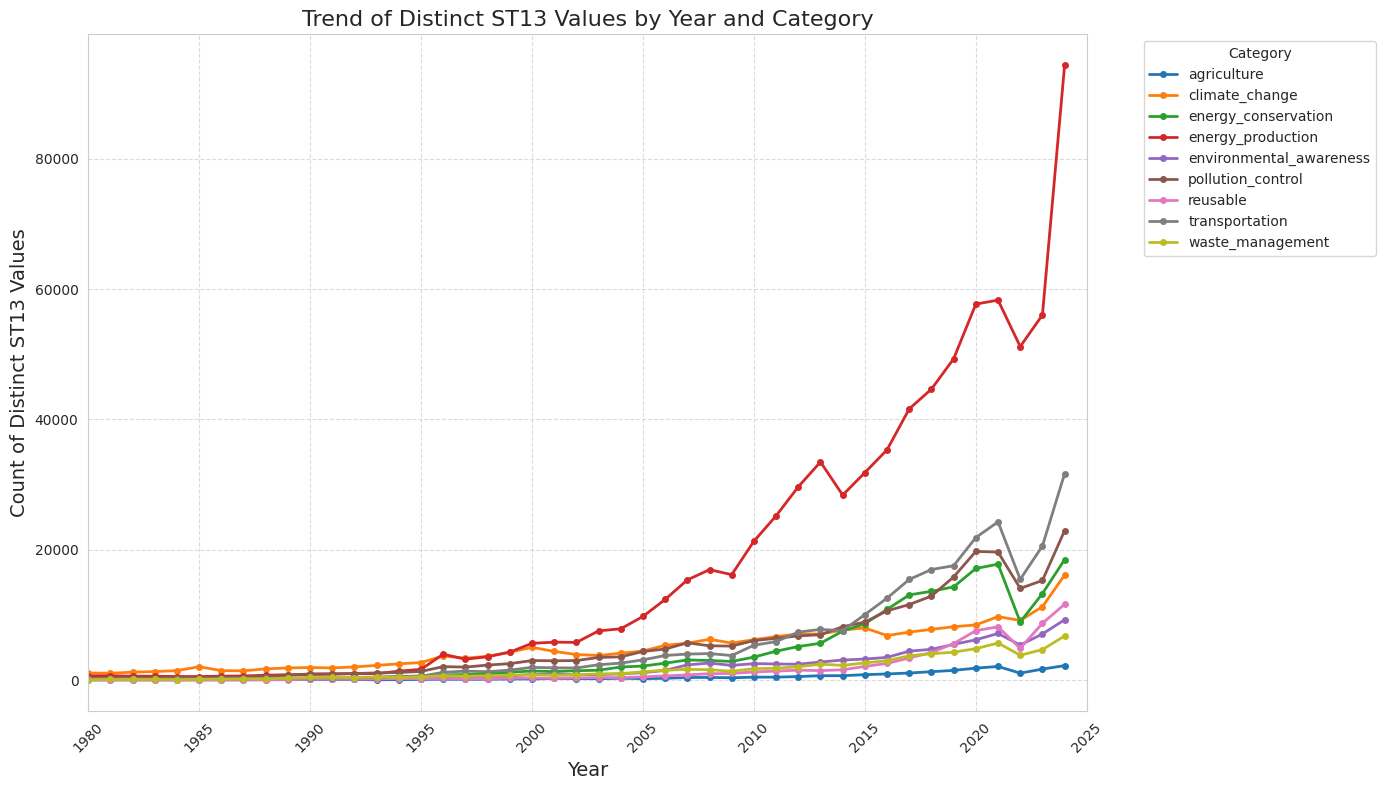


--- Summary Statistics ---

Peak Years for Distinct ST13 Values (All Categories Combined):
year
2024.0    213441
2021.0    152832
2020.0    145323
2023.0    138563
2019.0    122041
2022.0    113900
2018.0    110190
2017.0    101747
2016.0     86173
2015.0     76240
Name: distinct_st13_count, dtype: int64

Top 5 Years by Distinct ST13 Count for Each Category:

agriculture:
       year  distinct_st13_count
396  2024.0                 2223
369  2021.0                 2090
360  2020.0                 1833
387  2023.0                 1684
351  2019.0                 1490

climate_change:
       year  distinct_st13_count
397  2024.0                16114
388  2023.0                11260
370  2021.0                 9736
379  2022.0                 9152
361  2020.0                 8466

energy_conservation:
       year  distinct_st13_count
398  2024.0                18484
371  2021.0                17786
362  2020.0                17124
353  2019.0                14308
344  2018.0             

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, let's clean and prepare the data
def prepare_data(combined_data):
    # Convert year to numeric, handling non-numeric values
    combined_data['year'] = pd.to_numeric(combined_data['year'], errors='coerce')
    
    # Filter out rows with missing years or years that don't make sense
    valid_df = combined_data[combined_data['year'] >= 1980].copy()
    
    # Count distinct st13 values by year and category
    yearly_counts = valid_df.groupby(['year', 'category'])['st13'].nunique().reset_index()
    yearly_counts.rename(columns={'st13': 'distinct_st13_count'}, inplace=True)
    
    # Reshape to wide format for plotting
    pivot_df = yearly_counts.pivot(index='year', columns='category', values='distinct_st13_count')
    pivot_df = pivot_df.fillna(0)  # Replace NaN with 0
    
    return pivot_df, yearly_counts

# Create a line graph
def create_line_graph(pivot_df, yearly_counts):
    # Set up the plot style
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    
    # Plot each category as a separate line
    for category in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[category], marker='o', markersize=4, linewidth=2, label=category)
    
    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Count of Distinct ST13 Values', fontsize=14)
    plt.title('Trend of Distinct ST13 Values by Year and Category', fontsize=16)
    
    # Improve x-axis ticks
    min_year = pivot_df.index.min()
    max_year = pivot_df.index.max()
    plt.xlim(min_year, max_year)
    
    # Set x-axis ticks to show reasonable intervals
    year_range = max_year - min_year
    if year_range > 100:
        tick_interval = 20
    elif year_range > 50:
        tick_interval = 10
    else:
        tick_interval = 5
        
    x_ticks = np.arange(min_year - (min_year % tick_interval), max_year + tick_interval, tick_interval)
    plt.xticks(x_ticks, rotation=45)
    
    # Add legend with clear positioning
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid for easier reading
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Tight layout to ensure everything fits
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('mercedes/st13_year_category_trend.png', dpi=300, bbox_inches='tight')
    
    # Return the plot for display
    return plt

# Generate summary statistics
def generate_summary(yearly_counts):
    # Get top years by distinct ST13 count for each category
    category_summary = {}
    for category in yearly_counts['category'].unique():
        category_data = yearly_counts[yearly_counts['category'] == category]
        top_years = category_data.sort_values('distinct_st13_count', ascending=False).head(5)
        category_summary[category] = top_years[['year', 'distinct_st13_count']]
    
    # Get overall peak years across all categories
    peak_years = yearly_counts.groupby('year')['distinct_st13_count'].sum().sort_values(ascending=False).head(10)
    
    return category_summary, peak_years

# Execute the analysis
# First, load your data (uncomment and modify this line to match your data source)
# combined_data = pd.read_csv('your_data_file.csv')

# Then run the analysis
pivot_df, yearly_counts = prepare_data(combined_data)
plot = create_line_graph(pivot_df, yearly_counts)
category_summary, peak_years = generate_summary(yearly_counts)

# Display the plot
plot.show()

# Print summary statistics
print("\n--- Summary Statistics ---\n")

print("Peak Years for Distinct ST13 Values (All Categories Combined):")
print(peak_years)

print("\nTop 5 Years by Distinct ST13 Count for Each Category:")
for category, top_years in category_summary.items():
    print(f"\n{category}:")
    print(top_years)

# Calculate trend over time
print("\nGrowth Trends:")
for category in yearly_counts['category'].unique():
    category_data = yearly_counts[yearly_counts['category'] == category].sort_values('year')
    
    if len(category_data) > 5:  # Only calculate if we have enough data points
        # Calculate average annual growth rate
        start_year = category_data['year'].min()
        end_year = category_data['year'].max()
        start_count = category_data[category_data['year'] == start_year]['distinct_st13_count'].values[0]
        end_count = category_data[category_data['year'] == end_year]['distinct_st13_count'].values[0]
        
        years_diff = end_year - start_year
        if years_diff > 0 and start_count > 0:
            growth_rate = ((end_count / start_count) ** (1 / years_diff) - 1) * 100
            print(f"{category}: Average annual growth rate of {growth_rate:.2f}% from {int(start_year)} to {int(end_year)}")

In [37]:
combined_data.to_csv('mercedes/combined_data.csv', index=False)

In [10]:
import pandas as pd

# Read the saved CSV file back into a DataFrame
df = pd.read_csv('mercedes/combined_data.csv')

# Display the first few rows to verify it loaded correctly
print(df.head())

# Get basic information about the DataFrame
print(f"\nDataFrame shape: {df.shape}")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(df.columns)}")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df.describe())

# Count of unique values in categorical columns
print("\nUnique values in key columns:")
for col in ['tag', 'language_code', 'year']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

/tmp/ipykernel_1121469/2121265936.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mercedes/combined_data.csv')


  language_code               st13  year  term_count      tag  nc  \
0            en  BZ500001000008359  1997          34  biofuel   1   
1            en  AU500000002375302  2022          87  biofuel   1   
2            en  AU500000002443180  2022          52  biofuel   4   
3            en  BT50000M0M1729911  2023          73  biofuel  40   
4            en  BT50000M0M1770355  2023          25  biofuel   4   

            category source_file  
0  energy_production      tm.csv  
1  energy_production      tm.csv  
2  energy_production      tm.csv  
3  energy_production      tm.csv  
4  energy_production      tm.csv  

DataFrame shape: (1989389, 8)
Number of rows: 1989389
Number of columns: 8
Columns: language_code, st13, year, term_count, tag, nc, category, source_file

Missing values per column:
Series([], dtype: int64)

Basic statistics for numeric columns:
         term_count            nc
count  1.989389e+06  1.989389e+06
mean   8.019685e+01  1.790508e+01
std    2.591931e+02  1.300

In [16]:
df

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv
1989385,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv
1989386,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv
1989387,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv


Top 20 category-NC combinations by distinct ST13 count:
                    category  nc   count
134        energy_production  11  242192
90       energy_conservation   9  144937
132        energy_production   9  142741
50            climate_change  11  106310
315           transportation   9   91872
318           transportation  12   79960
158        energy_production  35   55146
227        pollution_control  11   52181
165        energy_production  42   48288
130        energy_production   7   40752
78            climate_change  42   37726
48            climate_change   9   32187
148        energy_production  25   30419
160        energy_production  37   30113
217        pollution_control   1   26945
225        pollution_control   9   25885
213  environmental_awareness  42   24882
153        energy_production  30   23083
280                 reusable  18   21784
77            climate_change  41   20619


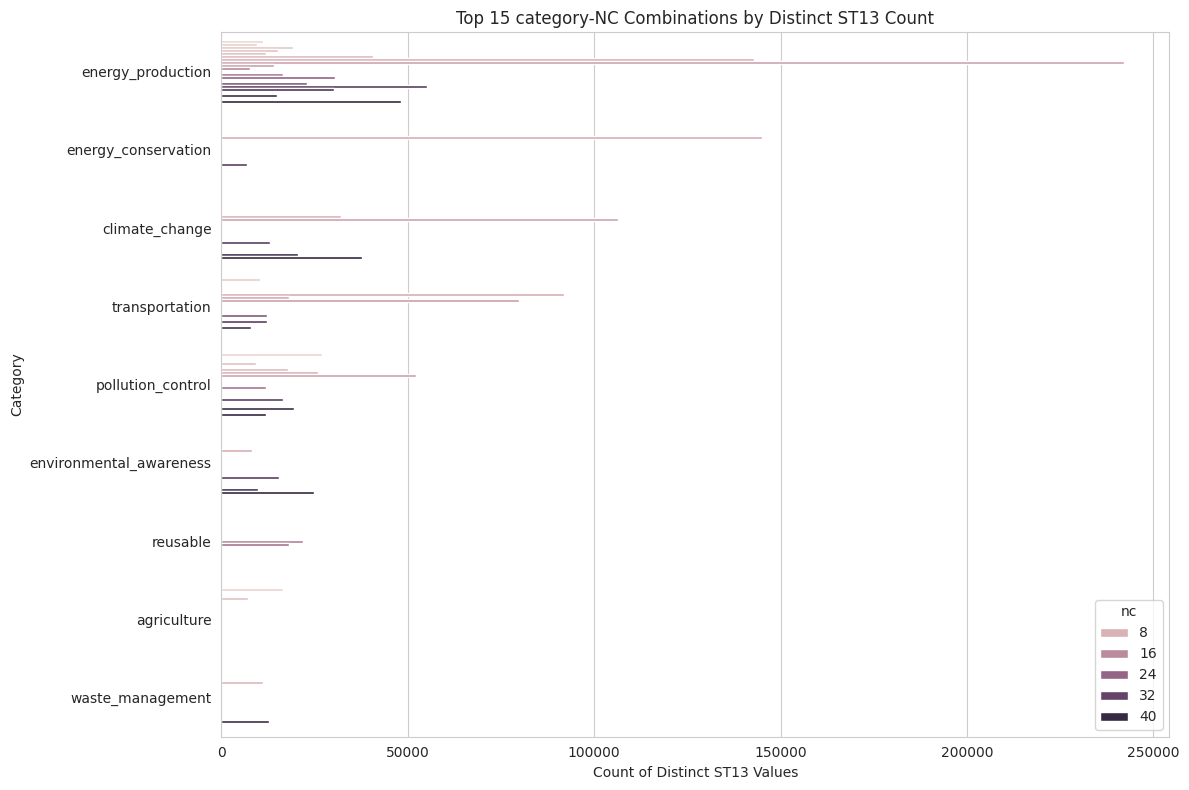

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count distinct st13 values by category and nc
tag_nc_counts = df.groupby(['category', 'nc'])['st13'].nunique().reset_index()
tag_nc_counts.columns = ['category', 'nc', 'count']

# Sort by count in descending order
tag_nc_counts = tag_nc_counts.sort_values('count', ascending=False)

# Print the top 20 combinations
print("Top 20 category-NC combinations by distinct ST13 count:")
print(tag_nc_counts.head(20))

# Save to CSV
tag_nc_counts.to_csv('mercedes/tag_nc_counts.csv', index=False)

# Simple bar chart of top 15 combinations
plt.figure(figsize=(12, 8))
top15 = tag_nc_counts.head(50)
sns.barplot(x='count', y='category', hue='nc', data=top15)
plt.title('Top 15 category-NC Combinations by Distinct ST13 Count')
plt.xlabel('Count of Distinct ST13 Values')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('mercedes/top_tag_nc_combinations.png')
plt.show()

Count of distinct ST13 values by Nice Classification:
    Nice_Classification   Count
8                     9  448291
10                   11  428440
41                   42  135346
34                   35  127826
11                   12   97900
6                     7   82673
0                     1   62866
20                   21   59361
36                   37   52992
39                   40   52527
40                   41   41764
4                     5   38372
24                   25   34883
2                     3   31617
29                   30   25489
17                   18   22666
15                   16   22081
38                   39   21550
3                     4   21284
16                   17   19708
27                   28   19538
5                     6   18851
35                   36   16245
9                    10   14235
43                   44   11002
18                   19   10873
31                   32    9555
7                     8    8726
19                

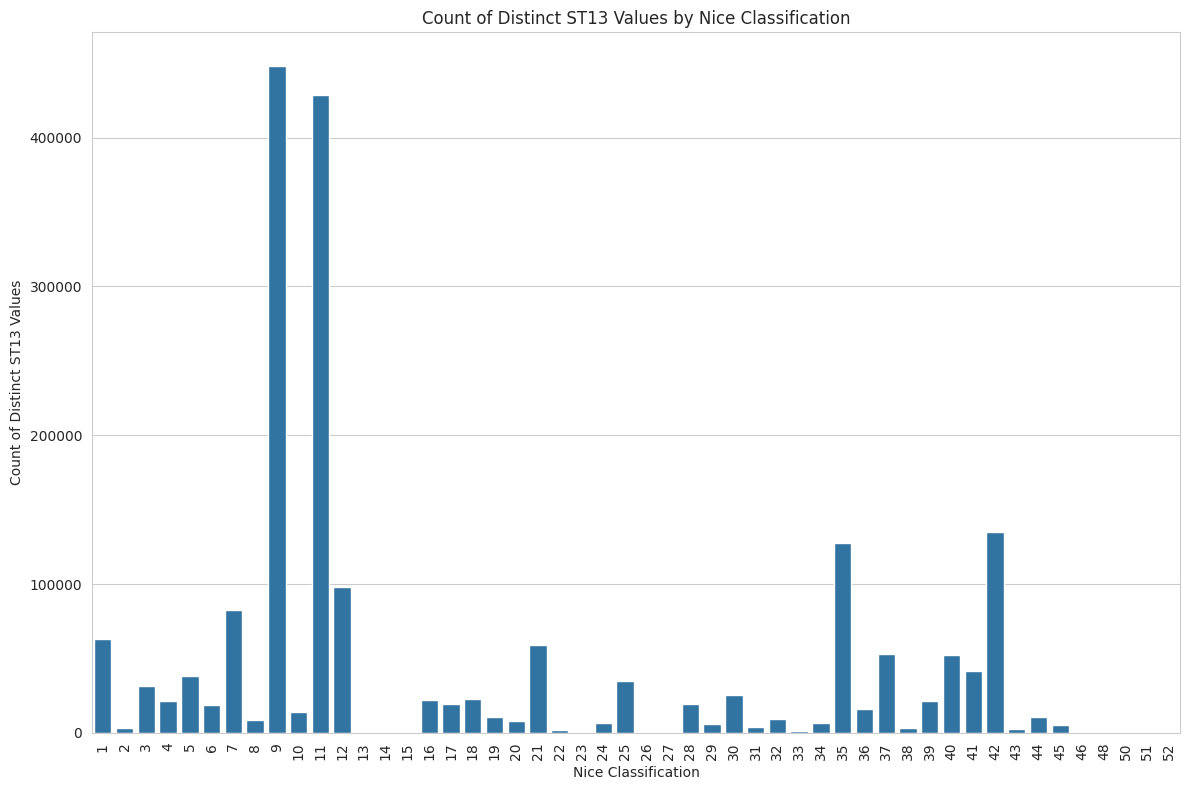

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count distinct st13 values by Nice Classification
nc_counts = df.groupby('nc')['st13'].nunique().reset_index()
nc_counts.columns = ['Nice_Classification', 'Count']

# Sort by count in descending order
nc_counts = nc_counts.sort_values('Count', ascending=False)

# Print the results
print("Count of distinct ST13 values by Nice Classification:")
print(nc_counts)

# Save to CSV
nc_counts.to_csv('mercedes/nc_counts.csv', index=False)

# Create a simple bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Nice_Classification', y='Count', data=nc_counts)
plt.title('Count of Distinct ST13 Values by Nice Classification')
plt.xlabel('Nice Classification')
plt.ylabel('Count of Distinct ST13 Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('mercedes/nc_counts_chart.png')
plt.show()

In [7]:
df

,language_code,st13,year,term_count,tag,nc,source_file
0,en,BW50199900M000276,1999.0,125,biofuel,42,tm.csv
1,en,BW50199900M000324,1999.0,125,biofuel,42,tm.csv
2,en,BW50199900M000387,1999.0,23,biofuel,4,tm.csv
3,en,BZ500002000017919,2022.0,20,biofuel,4,tm.csv
4,en,BZ500002000017920,2022.0,20,biofuel,4,tm.csv
...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022.0,20,carbon_monitor,42,tm28.csv
1989385,en,SG50202200059842U,2022.0,10,carbon_monitor,44,tm28.csv
1989386,en,SG50202200061477S,2022.0,64,carbon_monitor,9,tm28.csv
1989387,en,SG50202200063281W,2022.0,1,carbon_monitor,44,tm28.csv


In [19]:
df

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv
1989385,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv
1989386,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv
1989387,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure directory exists for saving figures
os.makedirs('mercedes', exist_ok=True)

# Get list of unique categories
categories = df['category'].unique()

# For each category, create a separate bar chart
for category in categories:
    # Filter data for this category
    category_df = df[df['category'] == category]
    
    # Count distinct st13 values by Nice Classification for this category
    nc_counts = category_df.groupby('nc')['st13'].nunique().reset_index()
    nc_counts.columns = ['Nice_Classification', 'Count']
    
    # Sort by count in descending order
    nc_counts = nc_counts.sort_values('Count', ascending=False)
    
    # Print the results
    print(f"\nCount of distinct ST13 values by Nice Classification for category '{category}':")
    print(nc_counts)
    
    # Save to CSV for each category
    nc_counts.to_csv(f'mercedes/nc_counts_{category}.csv', index=False)
    
    # Create a bar chart for this category
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Nice_Classification', y='Count', data=nc_counts)
    plt.title(f'Count of Distinct ST13 Values by Nice Classification - {category}')
    plt.xlabel('Nice Classification')
    plt.ylabel('Count of Distinct ST13 Values')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Create a filename-safe version of the category
    safe_category = "".join([c if c.isalnum() else "_" for c in str(category)])
    plt.savefig(f'mercedes/nc_counts_chart_{safe_category}.png')
    plt.close()  # Close the figure to free memory

print("\nAll charts have been saved to the mercedes directory.")


Count of distinct ST13 values by Nice Classification for category 'energy_production':
    Nice_Classification   Count
10                   11  242192
8                     9  142741
34                   35   55146
41                   42   48288
6                     7   40752
24                   25   30419
36                   37   30113
29                   30   23083
3                     4   19246
20                   21   16472
4                     5   15121
39                   40   14905
11                   12   14146
5                     6   12081
0                     1   11111
2                     3    9655
16                   17    7700
18                   19    6672
40                   41    6543
31                   32    6498
38                   39    6041
27                   28    6022
23                   24    4487
35                   36    4450
9                    10    3961
43                   44    2846
15                   16    2734
42              

In [23]:
df

,language_code,st13,year,term_count,tag,nc,category,source_file
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv
...,...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv
1989385,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv
1989386,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv
1989387,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv


In [24]:
df['first_two_digits'] = df['st13'].str[:2]

In [25]:
df

,language_code,st13,year,term_count,tag,nc,category,source_file,first_two_digits
0,en,BZ500001000008359,1997,34,biofuel,1,energy_production,tm.csv,BZ
1,en,AU500000002375302,2022,87,biofuel,1,energy_production,tm.csv,AU
2,en,AU500000002443180,2022,52,biofuel,4,energy_production,tm.csv,AU
3,en,BT50000M0M1729911,2023,73,biofuel,40,energy_production,tm.csv,BT
4,en,BT50000M0M1770355,2023,25,biofuel,4,energy_production,tm.csv,BT
...,...,...,...,...,...,...,...,...,...
1989384,en,SG50202200059208A,2022,20,carbon_monitor,42,climate_change,tm28.csv,SG
1989385,en,SG50202200059842U,2022,10,carbon_monitor,44,climate_change,tm28.csv,SG
1989386,en,SG50202200061477S,2022,64,carbon_monitor,9,climate_change,tm28.csv,SG
1989387,en,SG50202200063281W,2022,1,carbon_monitor,44,climate_change,tm28.csv,SG


In [27]:
# Group by category and get lists of country codes
category_country_groups = df.groupby('category')['first_two_digits'].apply(list).reset_index()

# For a cleaner display, get unique country codes per category
category_unique_countries = df.groupby('category')['first_two_digits'].apply(lambda x: list(set(x))).reset_index()
category_unique_countries.columns = ['category', 'country_codes']

print(category_unique_countries)

                  category                                      country_codes
0              agriculture  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...
1           climate_change  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...
2      energy_conservation  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...
3        energy_production  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, AP, MC, P...
4  environmental_awareness  [KH, GB, KE, EM, NA, BZ, IN, MZ, PG, ZW, SZ, M...
5        pollution_control  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, MC, PG, Z...
6                 reusable  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...
7           transportation  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...
8         waste_management  [KH, GB, KE, EM, NA, BZ, LA, IN, MZ, PG, ZW, S...


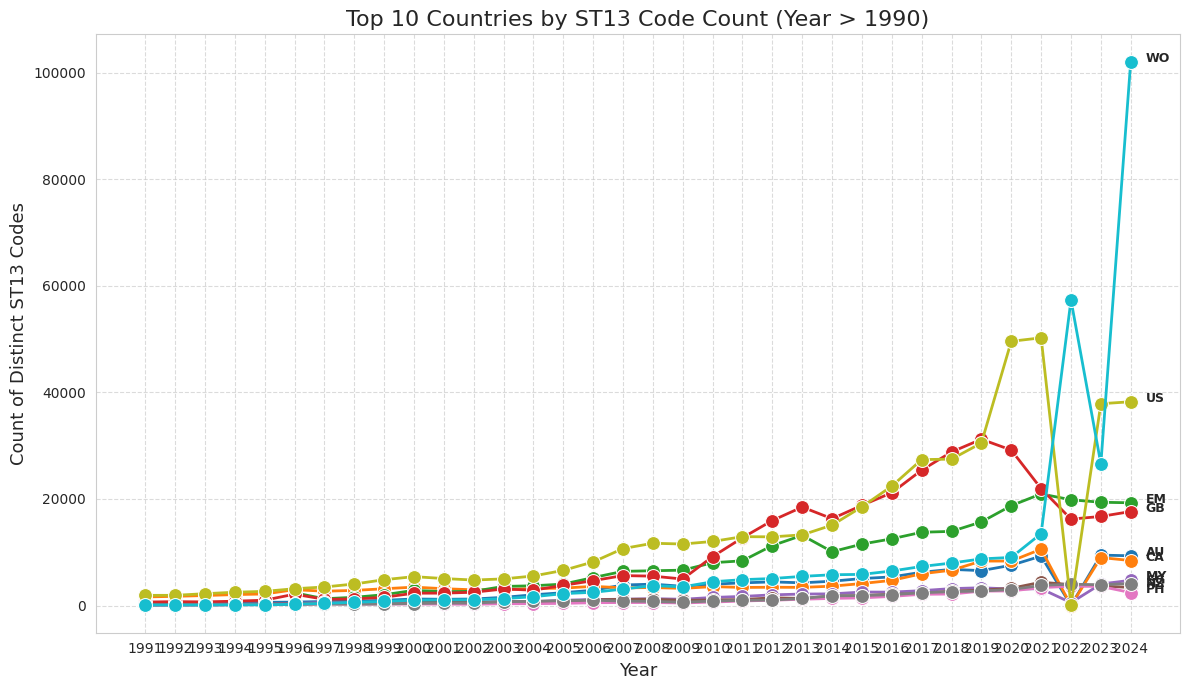

In [35]:


# Extract first two digits from ST13
df['first_two_digits'] = df['st13'].str[:2]

# Ensure year is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter for years > 1990
df = df[df['year'] > 1990]

# Count distinct ST13 codes by first_two_digits and year
count_by_country_year = df.groupby(['first_two_digits', 'year']).agg(
    distinct_st13_count=('st13', 'nunique')
).reset_index()

# Find the top 10 country codes by total distinct ST13 count
top_countries = count_by_country_year.groupby('first_two_digits')['distinct_st13_count'].sum().nlargest(10).index.tolist()

# Filter for only the top 10 countries
top_data = count_by_country_year[count_by_country_year['first_two_digits'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create the line plot
ax = sns.lineplot(
    data=top_data,
    x='year',
    y='distinct_st13_count',
    hue='first_two_digits',
    marker='o',
    markersize=10,
    linewidth=2
)

# Add data labels - place country code next to each line instead of using a legend
for country in top_countries:
    country_data = top_data[top_data['first_two_digits'] == country]
    # Find the last point for each country line to place the label
    if not country_data.empty:
        last_point = country_data.iloc[-1]
        plt.text(
            last_point['year'] + 0.5, 
            last_point['distinct_st13_count'], 
            country,
            fontsize=9,
            fontweight='bold'
        )

# Enhance the plot
plt.title('Top 10 Countries by ST13 Code Count (Year > 1990)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count of Distinct ST13 Codes', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)

# Remove the legend
plt.legend([],[], frameon=False)

# Improve x-axis ticks
plt.xticks(sorted(df['year'].unique()))

plt.tight_layout()
plt.savefig('top10_countries_st13_no_legend.png', dpi=300)
plt.show()